In [6]:
# ==================== #
# Author: Kenneth Chen #
# Student ID: 2100072  #
# ==================== #

# Notebook Configuration
GPU_COUNT = 1
WINDOWS = True
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [7]:
!pip install -q pandas
!pip install -q seaborn
!pip install -q matplotlib
!pip install -q neptune-client
!pip install torch-fidelity
!pip install torchmetrics

<img src="images/cifar10.PNG" width=700>

### References and Credits
I would like to attribute a lot of credit towards OpenAI and StudioGAN for providing quite a bit of base reference code to work with. Nevertheless, I suffered way too many headaches trying to adapt their python code structure into a Jupyter Notebook format. <a href="https://github.com/POSTECH-CVLab/PyTorch-StudioGAN/">GitHub</a>. 

# Generative Adversarial Networks - CIFAR10
> Can we create a strong generative model for CIFAR10 using the GAN architecture?

## Background Research 📖

### Introduction 💡
The ultimate goal of Deep Learning is to be able to create a function that can <strong>effectively model any form of data distribution</strong>. History has time and time again displayed the impressive success of discriminators, models that learn to divide the data distribution/map a high dimensional vector to one that is lower (Goodfellow et al., 2014). For instance, tasks such as Image Classification are one type of discriminative modelling, as the high dimensional images are mapped into low dimensional probabilities of labels.

What about generative modelling? In generative modelling, the goal is instead given a data distribution to learn from, to produce or <strong>generate new examples</strong> that follow this distribution but still aim to be unique. Thus, a high performing generative model should be able to create examples that are both <strong>plausible</strong> (in that one can recognize what the generated example is supposed to be of) <strong>and indistinguishable</strong> from real data examples (Brownlee, 2019). Generative models can be Unsupervised or Semi-Supervised, depending on the exact task that one is trying to tackle. 

There are different approaches to network architectures when it comes to trying to achieve Generative Models:
<ul>
	<li>Generative Adversarial Networks (GAN) </li>
	<li>Diffusion Models</li>
	<li>Variational Auto Encoders (VAE)</li>
</ul>

<strong>GANs ⚔️</strong> <br />
GANs are the main focus of this notebook. Proposed by Ian Goodfellow in 2014, it became one of the more popular types of Generative Models used. For instance, the commonly known website <a href="thispersondoesnotexist.com">thispersondoesnotexist.com</a> uses the StyleGAN2 architecture (Karras et al., 2020), to generate high fidelity images of humans. The idea for GANs is that <strong>there are two networks that work against each other in a game</strong>, where they try to one up each other. Thus, this leads to improvement in both networks. More details are discussed under "What's inside a GAN? 🔍".

<strong>Diffusion Models ✨</strong><br /> 
These are the models that have been not only been successful, but widely popular as well. For instance, OpenAI Dall-E, Google Imagen, Stable Diffusion, Midjourney are models that fall under the category of Diffusion Models. (Muppalla and Hendryx, 2022). From a high level, it works like so:
<ul>
	<li>Noise is added to original images</li>
	<li>Noise is procedurally added until image is all noise</li>
	<li>The model then learns to remove the noise</li>
	<li>Guidance can be added in the form of e.g. text-to-image, to provide direction of the generation process</li>
</ul>

<img src="images/diffusion1.jpg" width=400/><br />
*Noise is procedurally added to the image. Image Credit: (Muppalla and Hendryx, 2022)*

<img src="images/diffusion2.jpg" width=400/><br />
*Model attempts to recreate the image. Image Credit: (Muppalla and Hendryx, 2022)*

<strong>Variational Auto Encoders 🎲</strong><br />
We first take a look at what Auto Encoders are. An Auto Encoder is trained for it to learn to copy the input to the output (Goodfellow, Bengio and Courville, 2016). This is done by having an <strong>encoder map the image</strong> to a compressed representation of the image (the inner nodes), to which the decoder <strong>uses this compressed representation</strong> to generate an image similar to the original. Note that the trick is to <strong>restrict the number of inner nodes</strong> inside the network, such that it is <strong>not able to generate a 1-to-1 copy</strong>. This way, it's forced to learn the most promiment of features to recognize, using the limited number of nodes.

The idea with Variational Auto Encoders is that <strong>instead of the encoder just mapping the image to a compressed representation</strong> (aka latent vector), we instead <strong>learn the distribution that the latent vector can take on</strong>. Using this, we can then randomly sample from the learned latent distribution, for the decoder to give us a newly and controlled generated image.

<img src="images/vae.PNG" width=400/><br />
*VAE Architecture. We note the learning of the latent distribution in the form of $\mu$ (mean) and $\sigma$ (standard deviation). Image Credit: (Rocca, 2019)*


### What's inside a GAN? 🔍
In a GAN, there are in fact two networks, a <strong>generator</strong> and a <strong>discriminator</strong> that improve each other by competing in a game scenario (Goodfellow, Bengio and Courville, 2016). The aim is to use the well established field of discriminators to assist the generator. The goal of the generator is to <strong>create realistic images</strong> that appear to be from the distribution of the training images, where as the goal of the discriminator is to determine <strong>if a given image is from the data distribution</strong>. The process goes as follows:
<ol>
	<li>Generator creates images</li>
	<li>Discriminator learns to distinguish real vs fake from a set of real images and these newly generated images</li>
	<li>Using the updated Discriminator, Generator learns to trick the Discriminator</li>
</ol>

Mathematically speaking, the process of GANs can be described as so. 
Suppose we have some a random distribution or a "prior", which we can sample from. We can denote this as $p_z(z)$, where $z$ represents a vector of a specific size. This vector acts as the input to our generative model $G$. The model is ultimately described as $G(z; \theta_g)$ where $\theta_g$ represents the parameters of the generative model.

On the other hand, our discriminator model $D$, takes in an input $x$, an image, which can be fully described as $D(x; \theta_d)$, where likewise, $\theta_d$ represents the parameters of the discriminative model. Being the discriminator, $D(x)$ returns the probability that an input $x$ is from the.

This "game" between the two models can be thought of as trying to optimize of minimax function of:

$$\underset{G}{\text{min}}\underset{D}{\text{max}} V(D, G) = \mathbb{E}_{x \sim p_{\text{data}}(x)} [\text{log}D(x)] + \mathbb{E}_{z \sim p_{\text{z}}(z)} [\text{log}(1 - D(G(z)))]$$

<em style="text: center">(Goodfellow et al., 2014)</em>

Essentially, the function $V$ takes in two inputs, our models $D$ and $G$, and returns an output that has two parts. The left hand part of the sum $\mathbb{E}_{x \thicksim p_{\text{data}}(x)} [\text{log}D(x)]$ represents "the expected value that the discriminator model predicts real data is real". The right hand part of the sum $\mathbb{E}_{z \thicksim p_{\text{z}}(z)} [\text{log}(1 - D(G(z)))]$ looks at given some random vector $z$, "what is the expected value that the discriminator model predicts fake data is fake", in that the value of the right hand part is maximum when discriminator model is successful at labeling the fake images of a generator as fake.

$\underset{G}{\text{min}}\underset{D}{\text{max}}$ aims to do two things. Firstly, what is the generator model $G$ that *minimizes the value*, which means *the discriminator labels generator's images as real*. Secondly what is the disciminator model $D$ that will maximize this value, which means **discriminator model predicts real images as real and fake images as fake**. These two perfectly optimize each other, when the best approach the discriminator can take is to <strong>just guess randomly</strong> as the generator images are on the same realism as the real data.

### Types of GANs 🍐
There many different types of GANs, however I believe the most differing pair is the Vanilla GAN and the Conditional GAN. The Vanilla GAN is what was proposed by Ian Goodfellow in 2014, which consists of the basic architecture with multi-layer perceptrons (MLPs). Conditional GANs are different in the aspect that one can provide additional information to the model, which could be thought of as a form of guidance similar to diffusion models.

<img src="images/vanilla.jpg" width=400><br/>
*Vanilla GAN architecture (Tewari, N.d.)*

<img src="images/conditional.jpg" width=400><br/>

*Conditional GAN architecture (Tewari, N.d.)*

We observe that there is an extra component of `y`, which represents the extra information presented both to the Generator and Discriminator. This extra information is usually in the form of class labels to allow one to possess control over the output, but it can be extended to different modal data, even something such as text (in which case it needs some sort of text processor).

One may think of Conditional GAN as a more *"supervised" version* of Vanilla GANs, as some condition techniques (in the form of perhaps label information) are provided **to support the adversarial training**. Conditional GANs have in fact become **the go-to method of generating high-quality images** (Kang et al., 2021). This may be due to the fact that **when image sizes become larger** and there is **no sense of direction**, there can be a **significant** amount of overlapping generation that occurs.

What's more, is that even among Conditional GANs, the category can be further broken down into different methods of **inputing this conditional information**. The common methods are:
<ol>
	<li>Conditioning by concatenation</li>
	<li>Conditioning with projection discriminator</li>
	<li>Conditioning with auxiliary classifier</li>
	<li>Conditioning with batch normalization</li>
</ol>

In this notebook, we utilize and explore the above 4 techniques.


### Uses of GANs 🧤

As a GAN is a generative model, there are a large number of applications of GANs (Brownlee, 2019). Personally, I find it interesting how the idea of GANs can be adjusted for any modal of data, as long as the architecture for the encoder and decoders are adjusted accordingly. Here are a few areas of GANs I believe are quite intriguing:
<ul>
	<li>Time Series</li>
	<li>Image Generation</li>
	<li>Music Generation</li>
	<li>Audio Generation</li>
	<li>Style Transfer (e.g. winter photo to summer photo, jazz to classical music)</li>
</ul>

Among them, I think Audio Generation stands out to me the most. The idea of using GANs in music composition sounds like a difficult challenge, but also an impressive feat if one could pull it off.

### The difficulty with GANs 🧩
Despite having achieved great success at generating realistic and sharp looking images, they are still remarkably difficult to train (Arjovsky and Bottou, 2017). Different symptoms/signs may appear as a result of non-optimal training process or architecture. Below, we attempt to discuss what such that we are able to know what to pay attention to, when developing our GANs as well.

#### Mode collapse
One of the largest and continuing issues with the GAN training process is mode collapse. Mode collapse is said to occur if the generator **maps multiple different vectors** $z$ to the same output of $x$, where $x$ is a vector which the <strong>discriminator assigns high probability of being real</strong> to. In other words, the generator **exploits the discovery** that a particular output can fool the generator and thus ultimately produces, <strong>decreasing the diversity of one's outputs</strong>.

#### Mode Dropping
This is another case of decreasing the diversity of one's outputs, however not in the same way as Mode Collapse. In Mode Collapse, diversity is decreased within the classes. However, in Mode Dropping, diversity is decreased **among the classes**. Specifically, the generator may learn that for certain classes, it is difficult to generate an image, sufficiently realistic enough to trick the generator. Thus the generator may learn to simply just ignore these difficult classes, to be the most effective in the game against discriminator.

#### Non-Lipschitz Continuity
A real-valued function $f: \mathbb{R} \rightarrow \mathbb{R}$ possesses the property of Lipschitz continuity if

$$ |f(x_1) - f(x_2) | \leq K|x_1 - x_2| $$

where $K$ is some constant and $x$ represents the input. Intuitively, this means that when we change the value of $x$, we can expect to be <strong>relatively small</strong>, in that the change can be described as a result of linear growth rather than <strong>uncontrolled growth</strong>.

**What does this mean in the context of neural networks?** Suppose we have some network that **does not** possess the property of being Lipschitz continuous (this is possible because neural networks are essentially a composition of functions). As there is no bound of $K$, it means the output of the function can grow uncontrollably and a small change in the input **can possibly lead to large changes in the output**. This is bad for GANs, as we lose our sense of control and also means that moving along one dimension may result in drastically different changes in the output.

If we can enforce Lipschitz continuity in GANs, it means that a small change in the input, guarantees a relative small change in the output as well, which is what we want. One method of achieving this is to utilize a different loss function in GANs such as Wasserstein Distance. We explore approaches to tackling this issue further in the *"Developing GANs"* section.

### **GAN Metrics**: what does it mean to be good?

The most straight forward method of telling whether the output of a GAN is good, is to well, use our human eyes. On a smaller-sized experiment or if one is assessing a few images, this may be a valid approach. However, when the amount of data scale up to a very large quantity (which naturally is the case with Deep Learning), the act of visually inspecting every output is **simply infeasible**. Besides, using our eye as a metric means our feedback is **qualitative**. This means if it comes down to comparing the performances of two incredibly well-performing models, it's also difficult for one to tell which one is better. Thus, we need to define a set of quantitative metrics that we can use to substitute the use of our human eyes.

There is no one metric that is the *"best"* (Borji, 2018). Each metric has its own advantages and disadvantages, but ideally an efficient evaluation metric should:
<ol>
	<li>high quality</li>
	<li>diverse</li>
	<li>disentangled latent space</li>
</ol>
<em>(Borji, 2018)</em>

What is **Disentangled Latent Space**?
Latent space is straight forward, it's the typically smaller representation that in the context of GANs, acts as the input to the generator network. Disentangled latent space means that going along one dimension of the latent space representation, the changes reflected in the output should have only an appropriate level of overlap with outputs achieved by going along a different dimension. Thus, there are a few cases:

![VAE Disentanglement](images/disentangled.JPG)<br />
*(Mathieu et al., 2019)*

Above is the context in Variational Auto Encoders, however as the problem statement of generator images to mimic the real distribution is the same, thus the evaluation metrics being the same as well, I use the image to explain how the concept of disentangled latent space in the context of GANs.

We see there are a total of 3 possible cases:
<ul>
	<li>Insufficient overlap</li>
	<li>Appropriate Overlap</li>
	<li>Too Much Overlap</li>
</ul>

In the case of insufficient overlap, we see that moving along the latent distribution $p(z)$ provides the property of independence, in that there are no two latent spaces that affect two features of the output. However, the problem is that the generated image distribution is not, does not take up much of our ideal output distribution $p_{\theta}(x)$. In the case of too much overlap, as indicated by the large overlapping regions, it tells us that moving along one dimension of the latent space leads to a change in many different images among the distribution (which in this 2d representation can be interpretted as changing too many of the same features). Thus, the ideal or appropriate level of overlap here, as seen in the center image, is where there is a good level of independence, in that moving along one dimension of the latent space vector results to changes associated only with the latent space vector, and where the covered area is also large, taking up most of the space of our distribution $p_{\theta}(x)$.

How about the two others -- quality and diversity? 

##### **Measuring Quality**  
What we mean by quality here is not the resolution of the image (doesn't make sense for the generator to output high-res images when the training data is low resolution). Here, quality means how well one is able to recognize an image, as the class it is intended to be. The two most popular metrics are **Inception Score** and **Frechet Inception Distance**. The term **inception** comes from the fact that these two metrics **actually use** a pretrained Inception classifier to aid in producing the metric values.
<ul>
	<li>Inception Score <strong>(IS)</strong></li>
	<li>Frechet Inception Distance <strong>(FID)</strong></li>
</ul>

##### **Measuring Diversity**  
If we simply **focused on quality-measuring metrics**, our models may still be susceptible to something like Mode Collapse or Mode Dropping. We try to aim for a quantitative metric such as:
<ul>
	<li>Learned Perceptual Image Patch Similarity <strong>(LPIPS)</strong></li>
	<li>Number of statistically-different bins <strong>(NDB)</strong></li>
	<li><strong>I-Variance</strong></li>
</ul>

Further details of these metrics are discussed in later sections, when we evaluate the models.

# The CIFAR10 Dataset
<img src="images/cifar_random.png" width=300 />

As per our assignment, we are instructed to utilize the CIFAR10 dataset to **generate 1000 small colour images**. 

The CIFAR-10 dataset consists of **60000** `32x32` colour images in a total of 10 classes, with 6000 images per class (Krizhevsky, 2009).

## Developing GAN 💻
> Let's get to building our Conditional GAN.

Why Conditional GANs? As mentioned during the above background research section, Conditional GANs are. On top of this, Conditional GANs allow the user to <strong>control</strong> the output, where as Va.

Besides, if one appreciates the idea of not knowing what a Vanilla GAN may output, a simple random module can be attached as the conditional information to somewhat *hack* the Conditional GAN into being a normal GAN.

### Objectives 🖊️
We identify the tasks and objectives we want to meet, which will be used as a guide throughout the development of our Conditional GAN.
<ol>
	<li>Explore the CIFAR10 dataset</li>
	<li>Implement and evaluate to find the best performing model</li>
	<li>Analyse the final model</li>
</ol>

### Importing Libraries
The necessary libraries are imported below.

In [8]:
import torch
from torch import nn, autograd
from torch.utils.data import DataLoader, DistributedSampler
import torch.distributed as dist
from torch.nn import init
import torch.nn.functional as F

import config

import torchvision
from torchvision import transforms
from torchvision.utils import save_image

import torchmetrics

from tqdm import tqdm

import copy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
import pandas as pd
import numpy as np

import logging
from datetime import datetime
from os.path import dirname, exists, join

import scipy

### Utility Functions 🔨
We define some utility functions below that will ease and help us with our analysis.

#### Defining **Network Components**

In [9]:
def identity(x):
	return x

def loc_data(data, loc):
	datacopy = copy.deepcopy(data)
	arr = np.array(datacopy.loc[loc].drop('label'))
	label = datacopy.loc[loc]['label']
	root = int(len(arr) ** 0.5)
	arr.resize((root, root))
	return label, arr

def reshape_weight_to_matrix(weight):
    weight_mat = weight
    dim = 0
    if dim != 0:
        weight_mat = weight_mat.permute(dim, *[d for d in range(weight_mat.dim()) if d != dim])
    height = weight_mat.size(0)
    return weight_mat.reshape(height, -1)

def make_logger(save_dir, run_name, log_output):
    if log_output is not None:
        run_name = log_output.split('/')[-1].split('.')[0]
    logger = logging.getLogger(run_name)
    logger.propagate = False
    log_filepath = log_output if log_output is not None else join(save_dir, "logs", run_name + ".log")

    log_dir = dirname(log_filepath)
    if not exists(log_dir):
        os.makedirs(log_dir)

    if not logger.handlers:  # execute only if logger doesn't already exist
        file_handler = logging.FileHandler(log_filepath, 'a', 'utf-8')
        stream_handler = logging.StreamHandler(os.sys.stdout)

        formatter = logging.Formatter('[%(levelname)s] %(asctime)s > %(message)s', datefmt="%Y-%m-%d %H:%M:%S")

        file_handler.setFormatter(formatter)
        stream_handler.setFormatter(formatter)

        logger.addHandler(file_handler)
        logger.addHandler(stream_handler)
        logger.setLevel(logging.INFO)
    return logger

def accm_values_convert_dict(list_dict, value_dict, step, interval):
    for name, value_list in list_dict.items():
        if step is None:
            value_list += [value_dict[name]]
        else:
            try:
                value_list[step // interval - 1] = value_dict[name]
            except IndexError:
                try:
                    value_list += [value_dict[name]]
                except:
                    raise KeyError
        list_dict[name] = value_list
    return list_dict

def imshow(arr: list, label: list = None, figsize = None, shape = (32, 32, 3), is_int = None, fig_shape = None):
	if is_int == None:
		if type(arr[0]) == torch.Tensor:
			is_int = (arr[0].detach().cpu().numpy() > 1).sum() > 0
		else:
			is_int = (arr[0] > 1).sum() > 0
	if len(label) == 0:
		label = [''] * len(arr)

	if fig_shape == None:
		height = int(len(arr) ** 0.5)
		width = math.ceil(len(arr) / height)
	else:
		height = fig_shape[0]
		width = fig_shape[1]

	X_means = np.array([0.4919, 0.4827, 0.4472])
	X_stds = np.array([0.2470, 0.2434, 0.2616])
	unnormalize = transforms.Normalize((-X_means / X_stds).tolist(), (1.0 / X_stds).tolist())

	if figsize == None:
		fig = plt.figure()
	else:
		fig = plt.figure(figsize=figsize)
	for i in range(height):
		for j in range(width):
			if (i * width + j >= len(arr)):
				break
			ax = fig.add_subplot(height, width, i * width + j + 1)
			ax.grid(False)
			ax.set_xticks([])
			ax.set_yticks([])
			show = arr[i * width + j]
			if type(arr[i * width + j]) != torch.Tensor:
				show = torch.Tensor(show)
			
			show = (show + 1) / 2
			if len(show.squeeze(0).cpu().shape) == 2:
				ax.imshow((show.squeeze(0).detach().cpu()).type(torch.uint8 if is_int else torch.float), cmap='gray')
			else:

				try:
					ax.imshow((show.squeeze(0).detach().cpu().permute(1,2,0)).type(torch.uint8 if is_int else torch.float))
				except:
					ax.imshow((show.squeeze(0).detach().cpu()).type(torch.uint8 if is_int else torch.float))
			ax.set_title(label[i * width + j])

	return fig, ax

def df_to_tensor(df, shape = (32, 32)):
	return torch.tensor(df.values.reshape((-1, *shape)), dtype=torch.float32)

def preprocess(df):
	return df.copy() / 255

def count_parameters(module):
    return "Number of parameters: {num}".format(num=sum([p.data.nelement() for p in module.parameters()]))

# Credits to StudioGAN for function reference
def set_deterministic_op_trainable(m):
	if isinstance(m, torch.nn.modules.conv.Conv2d):
		m.train()
	if isinstance(m, torch.nn.modules.conv.ConvTranspose2d):
		m.train()
	if isinstance(m, torch.nn.modules.linear.Linear):
		m.train()
	if isinstance(m, torch.nn.modules.Embedding):
		m.train()

def untrack_bn_statistics(m):
	if isinstance(m, torch.nn.modules.batchnorm._BatchNorm):
		m.track_running_stats = False

def track_bn_statistics(m):
	if isinstance(m, torch.nn.modules.batchnorm._BatchNorm):
		m.track_running_stats = True

class dummy_context_mgr():
	def __enter__(self):
		return None

	def __exit__(self, exc_type, exc_value, traceback):
		return False


def sample_y(y_sampler, batch_size, num_classes, device):
	if y_sampler == "totally_random":
		y_fake = torch.randint(low=0, high=num_classes, size=(batch_size, ), dtype=torch.long, device=device)

	elif y_sampler == "acending_some":
		assert batch_size % 8 == 0, "The size of batches should be a multiple of 8."
		num_classes_plot = batch_size // 8
		indices = np.random.permutation(num_classes)[:num_classes_plot]

	elif y_sampler == "acending_all":
		batch_size = num_classes * 8
		indices = [c for c in range(num_classes)]

	elif isinstance(y_sampler, int):
		y_fake = torch.tensor([y_sampler] * batch_size, dtype=torch.long).to(device)
	else:
		y_fake = None

	if y_sampler in ["acending_some", "acending_all"]:
		y_fake = []
		for idx in indices:
			y_fake += [idx] * 8
		y_fake = torch.tensor(y_fake, dtype=torch.long).to(device)
	return y_fake

from scipy.stats import truncnorm

def truncated_normal(size, threshold=1.):
	values = truncnorm.rvs(-threshold, threshold, size=size)
	return values

def sample_normal(batch_size, z_dim, truncation_factor, device):
	if truncation_factor == -1.0:
		latents = torch.randn(batch_size, z_dim, device=device)
	elif truncation_factor > 0:
		latents = torch.FloatTensor(truncated_normal([batch_size, z_dim], truncation_factor)).to(device)
	else:
		raise ValueError("truncated_factor must be positive.")
	return latents

def sample_zy(z_prior, batch_size, z_dim, num_classes, truncation_factor, y_sampler, radius, device, random_gen = None):
	fake_labels = sample_y(y_sampler=y_sampler, batch_size=batch_size, num_classes=num_classes, device=device)
	batch_size = fake_labels.shape[0]


	if z_prior == "gaussian":
		zs = sample_normal(batch_size=batch_size, z_dim=z_dim, truncation_factor=truncation_factor, device=device)
	elif z_prior == "uniform":
		zs = torch.FloatTensor(batch_size, z_dim).uniform_(-1.0, 1.0).to(device)
	elif z_prior == "fixed":
		assert random_gen != None, "generator must not be none"
		saved_state = random_gen.get_state()
		zs = torch.FloatTensor(batch_size, z_dim).uniform_(-1.0, 1.0, generator = random_gen).to(device)
		random_gen.set_state(saved_state)
	else:
		raise NotImplementedError

	if isinstance(radius, float) and radius > 0.0:
		if z_prior == "gaussian":
			zs_eps = zs + radius * sample_normal(batch_size, z_dim, -1.0, device)
		elif z_prior == "uniform":
			zs_eps = zs + radius * torch.FloatTensor(batch_size, z_dim).uniform_(-1.0, 1.0).to(device)
	else:
		zs_eps = None

	return zs, fake_labels, zs_eps


def make_GAN_trainable(Gen, Gen_ema, Dis):
	Gen.train()
	Gen.apply(track_bn_statistics)
	if Gen_ema is not None:
		Gen_ema.train()
		Gen_ema.apply(track_bn_statistics)

	Dis.train()
	Dis.apply(track_bn_statistics)

def peel_model(model):
	if isinstance(model, nn.DataParallel):
		model = model.module
	return model

def toggle_grad(model, grad, num_freeze_layers=-1, is_stylegan=False):
	model = peel_model(model)
	if is_stylegan:
		for name, param in model.named_parameters():
			param.requires_grad = grad
	else:
		try:
			num_blocks = len(model.in_dims)
			assert num_freeze_layers < num_blocks,\
				"cannot freeze the {nfl}th block > total {nb} blocks.".format(nfl=num_freeze_layers,
																			nb=num_blocks)
		except:
			pass

		if num_freeze_layers == -1:
			for name, param in model.named_parameters():
				param.requires_grad = grad
		else:
			assert grad, "cannot freeze the model when grad is False"
			for name, param in model.named_parameters():
				param.requires_grad = True
				for layer in range(num_freeze_layers):
					block_name = "blocks.{layer}".format(layer=layer)
					if block_name in name:
						param.requires_grad = False

def calculate_all_sn(model, prefix):
    sigmas = {}
    with torch.no_grad():
        for name, param in model.named_parameters():
            operations = model
            if "weight_orig" in name:
                splited_name = name.split(".")
                for name_element in splited_name[:-1]:
                    operations = getattr(operations, name_element)
                weight_orig = reshape_weight_to_matrix(operations.weight_orig)
                weight_u = operations.weight_u
                weight_v = operations.weight_v
                sigmas[prefix + "_" + name] = torch.dot(weight_u, torch.mv(weight_orig, weight_v)).item()
    return sigmas

def cal_deriv(inputs, outputs, device):
	grads = autograd.grad(outputs=outputs,
						  inputs=inputs,
						  grad_outputs=torch.ones(outputs.size()).to(device),
						  create_graph=True,
						  retain_graph=True,
						  only_inputs=True)[0]
	return grads

def cal_r1_reg(adv_output, images, device):
	batch_size = images.size(0)
	grad_dout = cal_deriv(inputs=images, outputs=adv_output.sum(), device=device)
	grad_dout2 = grad_dout.pow(2)
	assert (grad_dout2.size() == images.size())
	r1_reg = 0.5 * grad_dout2.contiguous().view(batch_size, -1).sum(1).mean(0) + images[:,0,0,0].mean()*0
	return r1_reg

def cal_maxgrad_penalty(real_images, real_labels, fake_images, discriminator, device):
	batch_size, c, h, w = real_images.shape
	alpha = torch.rand(batch_size, 1)
	alpha = alpha.expand(batch_size, real_images.nelement() // batch_size).contiguous().view(batch_size, c, h, w)
	alpha = alpha.to(device)

	real_images = real_images.to(device)
	interpolates = alpha * real_images + ((1 - alpha) * fake_images)
	interpolates = interpolates.to(device)
	interpolates = autograd.Variable(interpolates, requires_grad=True)
	fake_dict = discriminator(interpolates, real_labels, eval=False)
	grads = cal_deriv(inputs=interpolates, outputs=fake_dict["adv_output"], device=device)
	grads = grads.view(grads.size(0), -1)

	maxgrad_penalty = torch.max(grads.norm(2, dim=1)**2) + interpolates[:,0,0,0].mean()*0
	return maxgrad_penalty

def generate_images(z_prior, truncation_factor, batch_size, z_dim, num_classes, y_sampler, radius, generator, discriminator,
					is_train, LOSS, RUN, MODEL, device, is_stylegan, cal_trsp_cost, random_gen = None):
	if is_train:
		truncation_factor = -1.0
		lo_steps = LOSS.lo_steps4train
		apply_langevin = False
	else:
		lo_steps = LOSS.lo_steps4eval
		if truncation_factor != -1:
			if is_stylegan:
				assert 0 <= truncation_factor <= 1, "Stylegan truncation_factor must lie btw 0(strong truncation) ~ 1(no truncation)"
			else:
				assert 0 <= truncation_factor, "truncation_factor must lie btw 0(strong truncation) ~ inf(no truncation)"

	zs, fake_labels, zs_eps = sample_zy(z_prior=z_prior,
										batch_size=batch_size,
										z_dim=z_dim,
										num_classes=num_classes,
										truncation_factor=-1 if is_stylegan else truncation_factor,
										y_sampler=y_sampler,
										radius=radius,
										device=device,
										random_gen = random_gen)
	batch_size = fake_labels.shape[0]
	info_discrete_c, info_conti_c = None, None
	if MODEL.info_type in ["discrete", "both"]:
		info_discrete_c = torch.randint(MODEL.info_dim_discrete_c,(batch_size, MODEL.info_num_discrete_c), device=device)
		zs = torch.cat((zs, F.one_hot(info_discrete_c, MODEL.info_dim_discrete_c).view(batch_size, -1)), dim=1)
	if MODEL.info_type in ["continuous", "both"]:
		info_conti_c = torch.rand(batch_size, MODEL.info_num_conti_c, device=device) * 2 - 1
		zs = torch.cat((zs, info_conti_c), dim=1)

	trsp_cost = None
	fake_images = generator(zs, fake_labels, eval=not is_train)
	ws = None

	if zs_eps is not None:
		fake_images_eps = generator(zs_eps, fake_labels, eval=not is_train)
	else:
		fake_images_eps = None
	return fake_images, fake_labels, fake_images_eps, trsp_cost, ws, info_discrete_c, info_conti_c

# Exponential Moving Average
class Ema(object):
    def __init__(self, source, target, decay=0.9999, start_iter=0):
        self.source = source
        self.target = target
        self.decay = decay
        self.start_iter = start_iter
        self.source_dict = self.source.state_dict()
        self.target_dict = self.target.state_dict()
        print("Initialize the copied generator's parameters to be source parameters.")
        with torch.no_grad():
            for p_ema, p in zip(self.target.parameters(), self.source.parameters()):
                p_ema.copy_(p)
            for b_ema, b in zip(self.target.buffers(), self.source.buffers()):
                b_ema.copy_(b)

    def update(self, iter=None):
        if iter >= 0 and iter < self.start_iter:
            decay = 0.0
        else:
            decay = self.decay

        with torch.no_grad():
            for p_ema, p in zip(self.target.parameters(), self.source.parameters()):
                p_ema.copy_(p.lerp(p_ema, decay))
            for (b_ema_name, b_ema), (b_name, b) in zip(self.target.named_buffers(), self.source.named_buffers()):
                if "num_batches_tracked" in b_ema_name:
                    b_ema.copy_(b)
                else:
                    b_ema.copy_(b.lerp(b_ema, decay))

def load_generator_discriminator(DATA, OPTIMIZATION, MODEL, STYLEGAN, MODULES, RUN, device, logger, Generator, Discriminator):
	# if device == 0:
	# 	logger.info("Build a Generative Adversarial Network.")
	# module = __import__("models.{backbone}".format(backbone=MODEL.backbone), fromlist=["something"])
	# if device == 0:
	# 	logger.info("Modules are located on './src/models.{backbone}'.".format(backbone=MODEL.backbone))

	Gen = Generator(z_dim=MODEL.z_dim,
							g_shared_dim=MODEL.g_shared_dim,
							img_size=DATA.img_size,
							g_conv_dim=MODEL.g_conv_dim,
							apply_attn=MODEL.apply_attn,
							attn_g_loc=MODEL.attn_g_loc,
							g_cond_mtd=MODEL.g_cond_mtd,
							num_classes=DATA.num_classes,
							g_init=MODEL.g_init,
							g_depth=MODEL.g_depth,
							MODULES=MODULES,
							MODEL=MODEL).to(device)

	Dis = Discriminator(img_size=DATA.img_size,
								d_conv_dim=MODEL.d_conv_dim,
								apply_d_sn=MODEL.apply_d_sn,
								apply_attn=MODEL.apply_attn,
								attn_d_loc=MODEL.attn_d_loc,
								d_cond_mtd=MODEL.d_cond_mtd,
								aux_cls_type=MODEL.aux_cls_type,
								d_embed_dim=MODEL.d_embed_dim,
								num_classes=DATA.num_classes,
								normalize_d_embed=MODEL.normalize_d_embed,
								d_init=MODEL.d_init,
								d_depth=MODEL.d_depth,
								MODULES=MODULES,
								MODEL=MODEL).to(device)
	if MODEL.apply_g_ema:
		# if device == 0:
		# 	logger.info("Prepare exponential moving average generator with decay rate of {decay}."\
		# 				.format(decay=MODEL.g_ema_decay))
		Gen_ema = copy.deepcopy(Gen)

		ema = Ema(source=Gen, target=Gen_ema, decay=MODEL.g_ema_decay, start_iter=MODEL.g_ema_start)
	else:
		Gen_ema, ema = None, None

	return Gen, Dis, Gen_ema, ema

### Exploratory Data Analysis 🗺️
To start off, let's try to get a better feel for the dataset.
We download the data from the Kaggle link: <a href="https://www.kaggle.com/datasets/pankrzysiu/cifar10-python">link</a>

<table>
	<tr>
		<th>
			Column Name
		</th>
		<th>
			Description
		</th>
	</tr>
	<tr>
		<td>
			pixel 1<br />
			...<br />
			pixel 3072
		</td>
		<td>
			Pixels representing the image, each pixel ranging from 0 to 255. Each image has a dimension of 32x32x3
		</td>
	</tr>
</table>

In [10]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

files = [f'data_batch_{i}' for i in range(1, 6)] + ['test_batch']

X = pd.DataFrame()
y = pd.DataFrame()
for file in files:
	X = pd.concat([X, pd.DataFrame(unpickle(f'data/{file}')[b'data'])])
	y = pd.concat([y, pd.DataFrame(unpickle(f'data/{file}')[b'labels'])])

print("X shape:",X.shape)
print("y shape:",y.shape)

X shape: (60000, 3072)
y shape: (60000, 1)


We see that there are a total of `60000` rows in both the `X DataFrame` and `y DataFrame`

Next, we open the metadata and see all the different labels we have. We see that <strong>there are a total of 10 classes</strong>.

In [11]:
classes = np.array(
	list(map(
		lambda x: x.decode('utf-8'),
		unpickle('data/batches.meta')[b'label_names']
	))
)
print("Number of classes:", len(classes))
print(classes)

Number of classes: 10
['airplane' 'automobile' 'bird' 'cat' 'deer' 'dog' 'frog' 'horse' 'ship'
 'truck']


#### Preprocessing
Before we move into EDA, we transform the dataframe to tensors, using the following transformations:
<ul>
	<li>Change from 3072 pixels to <code>3x32x32</code> images</li>
	<li>Normalize the values</li>
</ul>

In [12]:
# Here we reshape the 3072 pixels accordingly into 3 channels of 32x32 images
X_tensor = torch.Tensor(np.transpose(X.values.reshape((-1, 3, 32, 32)), axes=(0, 1, 2, 3)))

Next, we want to normalize the values. To do this, we firstly want to calculate <strong>the mean and standard deviations</strong> in the image. We note that this is done within each channel.

In [13]:
X_tensor.shape

torch.Size([60000, 3, 32, 32])

In [14]:
X_means = X_tensor.mean(axis=(0, 2, 3)) / 255
X_stds = X_tensor.std(axis=(0, 2, 3)) / 255
print("Means: ", X_means)
print("Standard Deviations:", X_stds)

Means:  tensor([0.4919, 0.4827, 0.4472])
Standard Deviations: tensor([0.2470, 0.2434, 0.2616])


Once we have the mean and standard deviations calculated, we then move onto dividing the pixel values by 255, to make the range between `0 - 1`. Only **after** we do this, do we apply the normalize transformation.

In [15]:
normalize = transforms.Normalize(X_means, X_stds)
X_tensor = normalize(X_tensor / 255)

#### Signs of Class Imbalance
We try to discover if there are any signs of class imbalance. If so, this may indicate that our data processing pipeline is incorrect.

In [16]:
pd.DataFrame(classes[y]).value_counts()

airplane      6000
automobile    6000
bird          6000
cat           6000
deer          6000
dog           6000
frog          6000
horse         6000
ship          6000
truck         6000
dtype: int64

We observe:
<ul>
	<li>For the `10` classes in the dataset, we see that each of the classes has a count of `6000`.</li>
	<li>Thus, we see there is no sign of class imbalance.</li>
</ul>

#### Null values?
Next, we perform a simple `.isnull()` check to see if there are any null values in any of our data.

In [17]:
null_counts = 0
for iter_data in [X, y]:
	null_counts += iter_data.isnull().sum().sum()

print("Null counts among ALL the data:", null_counts)

Null counts among ALL the data: 0


The data we have downloaded and used present no null values. Thus, we can proceed with further data exploration.

#### What does the average image look like?
First, we take a look at a few images from our dataset.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

(<Figure size 640x480 with 10 Axes>, <AxesSubplot: title={'center': 'cat'}>)

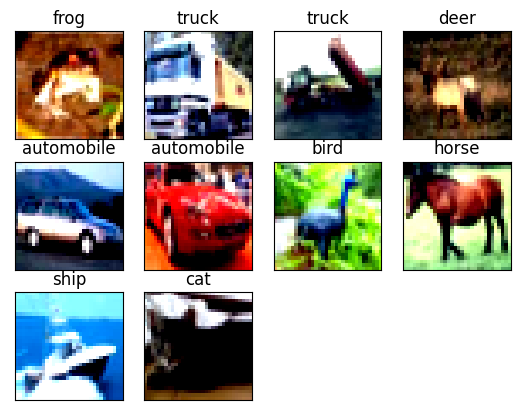

In [18]:
imshow(X_tensor[0:10], label = classes[y[0:10]].flatten().tolist(), is_int = False)

We observe:
<ul>
	<li>The objects in question such as <code>frog</code> and <code>deer</code>, do have some sort of background</li>
	<li>
		Visually, although the images are <strong>quite blurry</strong> due to the image size being <code>32x32</code>, it is still easy to tell the diffference between the classes.
	</li>
</ul>

What about the <strong>average of all images</strong>?

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: title={'center': 'Average of all'}>)

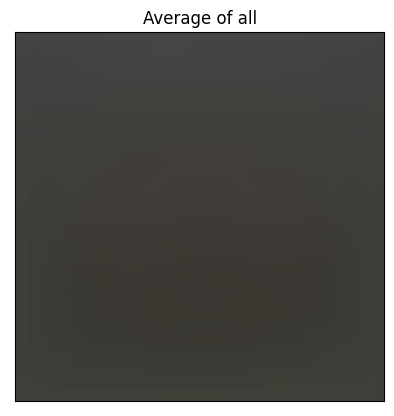

In [19]:
imshow([
	X.mean().apply(lambda x: x).values.reshape(3, 32, 32)
], ['Average of all'])

We observe that there is no significance in the average of all images.

<strong>Average image among the classes</strong><br />
We then split by the classes and find the average among each of the classes.

(<Figure size 1700x1000 with 10 Axes>,
 <AxesSubplot: title={'center': 'truck'}>)

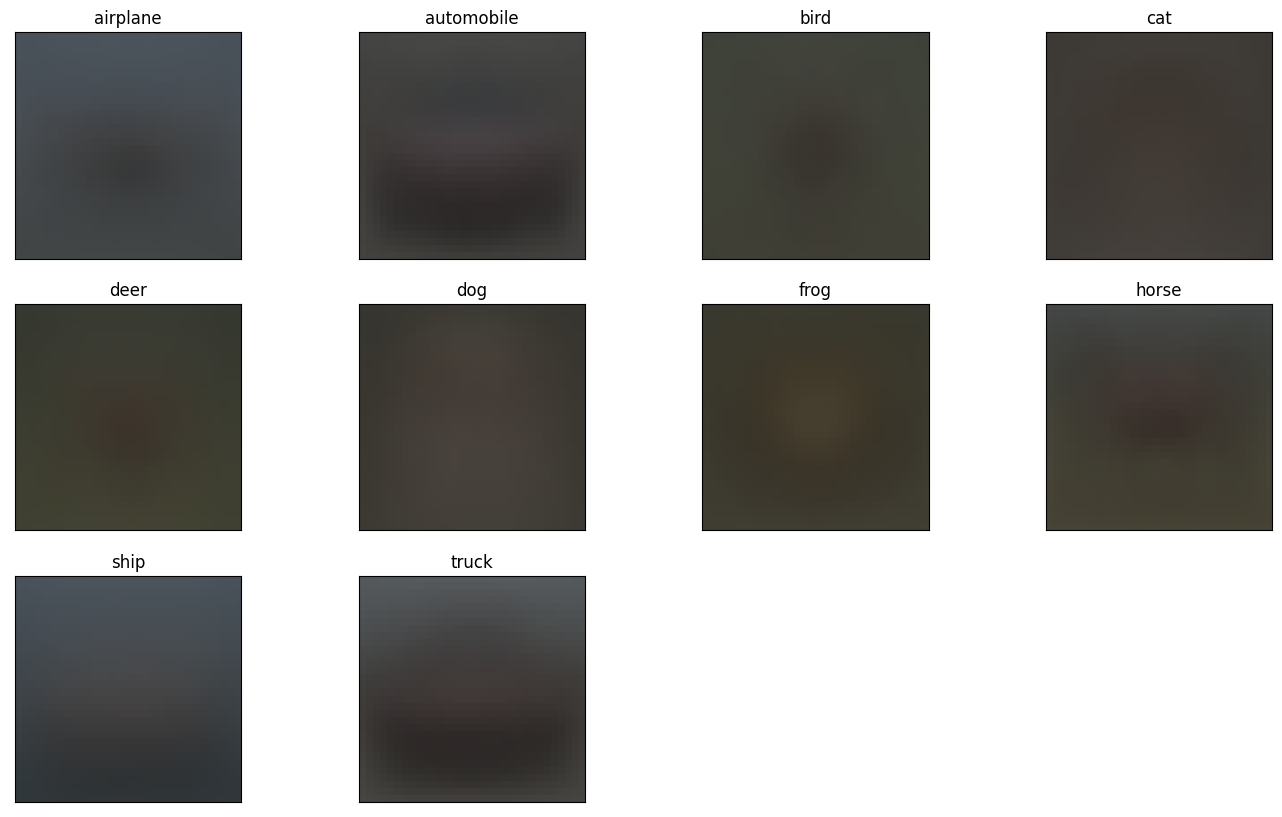

In [20]:
images = []
titles = []

for i in range(10):
	idx = np.where((y.values == i))[0].flatten()
	images.append(X.iloc[idx].values.reshape(-1, 3, 32, 32).mean(axis=0))
	titles.append(classes[i])

imshow(images, titles, figsize = (17, 10))

We observe:
<ul>
	<li>
		We manage to <em>slightly</em> make out the shape of the <code>horse</code>
	</li>
	<li>
		It appears that the average <code>horse</code> seems to have a more dominant precence when it faces the left, which is quite an interesting note.
	</li>
	<li>
		For most of the classes, we manage to make out some sort of contour in the center, however it still is pixelated and blurry.
	</li>
</ul>

In [21]:
def to_prob_dist(labels: torch.tensor, size = 100):
	arr = np.full((len(labels), size), 0)
	for i, label in enumerate(labels):
		arr[i][int(label.item())] = 1
	return torch.tensor(arr, dtype=torch.float32)

class TorchDataset(torch.utils.data.Dataset):
	def __init__(self, X, y, X_shape = (3, 32, 32), y_shape = (1, ), y_size = 10, transform = None):
		if (type(X) == torch.Tensor):
			self.x = X
		else:
			self.x = df_to_tensor(X, X_shape)
			self.x /= 255
			self.x *= 2
			self.x -= 1

		self.x = self.x.type(torch.float32)
		self.x = self.x.to(torch.device('cuda'))

		self.transform = transform
            
		if (type(y) == torch.Tensor):
			self.y = y
		else:
			self.y = df_to_tensor(y, y_shape)
			self.y = to_prob_dist(self.y, y_size)

		# Transform labels to probability distributions
	
	def __len__(self):
		return len(self.y)

	def __getitem__(self, idx):
		if torch.is_tensor(idx):
			idx = idx.tolist()

		selected = self.x[idx]
            
		if self.transform:
			selected = self.transform(selected)
        
		return selected, self.y[idx]

### Application and Evaluation of GAN Models
In this section, we attempt to make and apply our GAN models to tackle the CIFAR10 dataset. Additionally, for each model we try, we will also have a set of evaluation metrics and will analyze the outputs to gain a better understand of our progress.

The modeling process will go as such:
<ol>
	<li>Train the generator and discriminator</li>
	<li>Assess the progress</li>
	<li>Evaluate on a series of metrics</li>
	<li>Discover potential improvements and repeat</li>
</ol>

#### What are our <strong>evaluation metrics</strong>?
As our primary measure for **quality**, we will utilize both **Inception Score** and **Frechet Inception Distance**.

**I**

Frechet Inception Distance
Inception Score (Can't detect ModeCollapse)
Wasserstein Critic
Mode Collapse

#### Defining **Loss Functions**

In [22]:
class GatherLayer(torch.autograd.Function):
	"""
	This file is copied from
	https://github.com/open-mmlab/OpenSelfSup/blob/master/openselfsup/models/utils/gather_layer.py
	Gather tensors from all process, supporting backward propagation
	"""
	@staticmethod
	def forward(ctx, input):
		ctx.save_for_backward(input)
		output = [torch.zeros_like(input) for _ in range(dist.get_world_size())]
		dist.all_gather(output, input)
		return tuple(output)

	@staticmethod
	def backward(ctx, *grads):
		input, = ctx.saved_tensors
		grad_out = torch.zeros_like(input)
		grad_out[:] = grads[dist.get_rank()]
		return grad_out


class CrossEntropyLoss(torch.nn.Module):
	def __init__(self):
		super(CrossEntropyLoss, self).__init__()
		self.ce_loss = torch.nn.CrossEntropyLoss()

	def forward(self, cls_output, label, **_):
		return self.ce_loss(cls_output, label).mean()

class Data2DataCrossEntropyLoss(torch.nn.Module):
	def __init__(self, num_classes, temperature, m_p, master_rank, DDP):
		super(Data2DataCrossEntropyLoss, self).__init__()
		self.num_classes = num_classes
		self.temperature = temperature
		self.m_p = m_p
		self.master_rank = master_rank
		self.DDP = DDP
		self.calculate_similarity_matrix = self._calculate_similarity_matrix()
		self.cosine_similarity = torch.nn.CosineSimilarity(dim=-1)

	def _calculate_similarity_matrix(self):
		return self._cosine_simililarity_matrix

	def _cosine_simililarity_matrix(self, x, y):
		v = self.cosine_similarity(x.unsqueeze(1), y.unsqueeze(0))
		return v

	def make_index_matrix(self, labels):
		labels = labels.detach().cpu().numpy()
		num_samples = labels.shape[0]
		mask_multi, target = np.ones([self.num_classes, num_samples]), 0.0

		for c in range(self.num_classes):
			c_indices = np.where(labels==c)
			mask_multi[c, c_indices] = target
		return torch.tensor(mask_multi).type(torch.long).to(self.master_rank)

	def remove_diag(self, M):
		h, w = M.shape
		assert h==w, "h and w should be same"
		mask = np.ones((h, w)) - np.eye(h)
		mask = torch.from_numpy(mask)
		mask = (mask).type(torch.bool).to(self.master_rank)
		return M[mask].view(h, -1)

	def forward(self, embed, proxy, label, **_):
		# If train a GAN throuh DDP, gather all data on the master rank
		if self.DDP:
			embed = torch.cat(GatherLayer.apply(embed), dim=0)
			proxy = torch.cat(GatherLayer.apply(proxy), dim=0)
			label = torch.cat(GatherLayer.apply(label), dim=0)

		# calculate similarities between sample embeddings
		sim_matrix = self.calculate_similarity_matrix(embed, embed) + self.m_p - 1
		# remove diagonal terms
		sim_matrix = self.remove_diag(sim_matrix/self.temperature)
		# for numerical stability
		sim_max, _ = torch.max(sim_matrix, dim=1, keepdim=True)
		sim_matrix = F.relu(sim_matrix) - sim_max.detach()

		# calculate similarities between sample embeddings and the corresponding proxies
		smp2proxy = self.cosine_similarity(embed, proxy)
		# make false negative removal
		removal_fn = self.remove_diag(self.make_index_matrix(label)[label])
		# apply the negative removal to the similarity matrix
		improved_sim_matrix = removal_fn*torch.exp(sim_matrix)

		# compute positive attraction term
		pos_attr = F.relu((self.m_p - smp2proxy)/self.temperature)
		# compute negative repulsion term
		neg_repul = torch.log(torch.exp(-pos_attr) + improved_sim_matrix.sum(dim=1))
		# compute data to data cross-entropy criterion
		criterion = pos_attr + neg_repul
		return criterion.mean()

def enable_allreduce(dict_):
	loss = 0
	for key, value in dict_.items():
		if value is not None and key != "label":
			loss += value.mean()*0
	return loss


def d_vanilla(d_logit_real, d_logit_fake, DDP):
	d_loss = torch.mean(F.softplus(-d_logit_real)) + torch.mean(F.softplus(d_logit_fake))
	return d_loss


def g_vanilla(d_logit_fake, DDP):
	return torch.mean(F.softplus(-d_logit_fake))


def d_logistic(d_logit_real, d_logit_fake, DDP):
	d_loss = F.softplus(-d_logit_real) + F.softplus(d_logit_fake)
	return d_loss.mean()


def g_logistic(d_logit_fake, DDP):
	# basically same as g_vanilla.
	return F.softplus(-d_logit_fake).mean()


def d_ls(d_logit_real, d_logit_fake, DDP):
	d_loss = 0.5 * (d_logit_real - torch.ones_like(d_logit_real))**2 + 0.5 * (d_logit_fake)**2
	return d_loss.mean()


def g_ls(d_logit_fake, DDP):
	gen_loss = 0.5 * (d_logit_fake - torch.ones_like(d_logit_fake))**2
	return gen_loss.mean()


def d_hinge(d_logit_real, d_logit_fake, DDP):
	return torch.mean(F.relu(1. - d_logit_real)) + torch.mean(F.relu(1. + d_logit_fake))


def g_hinge(d_logit_fake, DDP):
	return -torch.mean(d_logit_fake)


def d_wasserstein(d_logit_real, d_logit_fake, DDP):
	return torch.mean(d_logit_fake - d_logit_real)


def g_wasserstein(d_logit_fake, DDP):
	return -torch.mean(d_logit_fake)


def crammer_singer_loss(adv_output, label, DDP, **_):
	# https://github.com/ilyakava/BigGAN-PyTorch/blob/master/train_fns.py
	# crammer singer criterion
	num_real_classes = adv_output.shape[1] - 1
	mask = torch.ones_like(adv_output).to(adv_output.device)
	mask.scatter_(1, label.unsqueeze(-1), 0)
	wrongs = torch.masked_select(adv_output, mask.bool()).reshape(adv_output.shape[0], num_real_classes)
	max_wrong, _ = wrongs.max(1)
	max_wrong = max_wrong.unsqueeze(-1)
	target = adv_output.gather(1, label.unsqueeze(-1))
	return torch.mean(F.relu(1 + max_wrong - target))


def feature_matching_loss(real_embed, fake_embed):
	# https://github.com/ilyakava/BigGAN-PyTorch/blob/master/train_fns.py
	# feature matching criterion
	fm_loss = torch.mean(torch.abs(torch.mean(fake_embed, 0) - torch.mean(real_embed, 0)))
	return fm_loss


def lecam_reg(d_logit_real, d_logit_fake, ema):
	reg = torch.mean(F.relu(d_logit_real - ema.D_fake).pow(2)) + \
		  torch.mean(F.relu(ema.D_real - d_logit_fake).pow(2))
	return reg


def cal_deriv(inputs, outputs, device):
	grads = autograd.grad(outputs=outputs,
						  inputs=inputs,
						  grad_outputs=torch.ones(outputs.size()).to(device),
						  create_graph=True,
						  retain_graph=True,
						  only_inputs=True)[0]
	return grads


def latent_optimise(zs, fake_labels, generator, discriminator, batch_size, lo_rate, lo_steps, lo_alpha, lo_beta, eval,
					cal_trsp_cost, device):
	for step in range(lo_steps - 1):
		drop_mask = (torch.FloatTensor(batch_size, 1).uniform_() > 1 - lo_rate).to(device)

		zs = autograd.Variable(zs, requires_grad=True)
		fake_images = generator(zs, fake_labels, eval=eval)
		fake_dict = discriminator(fake_images, fake_labels, eval=eval)
		z_grads = cal_deriv(inputs=zs, outputs=fake_dict["adv_output"], device=device)
		z_grads_norm = torch.unsqueeze((z_grads.norm(2, dim=1)**2), dim=1)
		delta_z = lo_alpha * z_grads / (lo_beta + z_grads_norm)
		zs = torch.clamp(zs + drop_mask * delta_z, -1.0, 1.0)

		if cal_trsp_cost:
			if step == 0:
				trsf_cost = (delta_z.norm(2, dim=1)**2).mean()
			else:
				trsf_cost += (delta_z.norm(2, dim=1)**2).mean()
		else:
			trsf_cost = None
		return zs, trsf_cost


def cal_grad_penalty(real_images, real_labels, fake_images, discriminator, device):
	batch_size, c, h, w = real_images.shape
	alpha = torch.rand(batch_size, 1)
	alpha = alpha.expand(batch_size, real_images.nelement() // batch_size).contiguous().view(batch_size, c, h, w)
	alpha = alpha.to(device)

	real_images = real_images.to(device)
	interpolates = alpha * real_images + ((1 - alpha) * fake_images)
	interpolates = interpolates.to(device)
	interpolates = autograd.Variable(interpolates, requires_grad=True)
	fake_dict = discriminator(interpolates, real_labels, eval=False)
	grads = cal_deriv(inputs=interpolates, outputs=fake_dict["adv_output"], device=device)
	grads = grads.view(grads.size(0), -1)

	grad_penalty = ((grads.norm(2, dim=1) - 1)**2).mean() + interpolates[:,0,0,0].mean()*0
	return grad_penalty


def cal_dra_penalty(real_images, real_labels, discriminator, device):
	batch_size, c, h, w = real_images.shape
	alpha = torch.rand(batch_size, 1, 1, 1)
	alpha = alpha.to(device)

	real_images = real_images.to(device)
	differences = 0.5 * real_images.std() * torch.rand(real_images.size()).to(device)
	interpolates = real_images + (alpha * differences)
	interpolates = interpolates.to(device)
	interpolates = autograd.Variable(interpolates, requires_grad=True)
	fake_dict = discriminator(interpolates, real_labels, eval=False)
	grads = cal_deriv(inputs=interpolates, outputs=fake_dict["adv_output"], device=device)
	grads = grads.view(grads.size(0), -1)

	grad_penalty = ((grads.norm(2, dim=1) - 1)**2).mean() + interpolates[:,0,0,0].mean()*0
	return grad_penalty


def cal_maxgrad_penalty(real_images, real_labels, fake_images, discriminator, device):
	batch_size, c, h, w = real_images.shape
	alpha = torch.rand(batch_size, 1)
	alpha = alpha.expand(batch_size, real_images.nelement() // batch_size).contiguous().view(batch_size, c, h, w)
	alpha = alpha.to(device)

	real_images = real_images.to(device)
	interpolates = alpha * real_images + ((1 - alpha) * fake_images)
	interpolates = interpolates.to(device)
	interpolates = autograd.Variable(interpolates, requires_grad=True)
	fake_dict = discriminator(interpolates, real_labels, eval=False)
	grads = cal_deriv(inputs=interpolates, outputs=fake_dict["adv_output"], device=device)
	grads = grads.view(grads.size(0), -1)

	maxgrad_penalty = torch.max(grads.norm(2, dim=1)**2) + interpolates[:,0,0,0].mean()*0
	return maxgrad_penalty


def cal_r1_reg(adv_output, images, device):
	batch_size = images.size(0)
	grad_dout = cal_deriv(inputs=images, outputs=adv_output.sum(), device=device)
	grad_dout2 = grad_dout.pow(2)
	assert (grad_dout2.size() == images.size())
	r1_reg = 0.5 * grad_dout2.contiguous().view(batch_size, -1).sum(1).mean(0) + images[:,0,0,0].mean()*0
	return r1_reg


def adjust_k(current_k, topk_gamma, inf_k):
	current_k = max(current_k * topk_gamma, inf_k)
	return current_k


def normal_nll_loss(x, mu, var):
	# https://github.com/Natsu6767/InfoGAN-PyTorch/blob/master/utils.py
	# Calculate the negative log likelihood of normal distribution.
	# Needs to be minimized in InfoGAN. (Treats Q(c]x) as a factored Gaussian)
	logli = -0.5 * (var.mul(2 * np.pi) + 1e-6).log() - (x - mu).pow(2).div(var.mul(2.0) + 1e-6)
	nll = -(logli.sum(1).mean())
	return nll

#### Defining **Augmentation**

In [23]:
"""
Copyright (c) 2020, Shengyu Zhao, Zhijian Liu, Ji Lin, Jun-Yan Zhu, and Song Han
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"
AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE
IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE
FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL
DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR
SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER
CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY,
OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE
OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
"""

### Differentiable Augmentation for Data-Efficient GAN Training (https://arxiv.org/abs/2006.10738)
### Shengyu Zhao, Zhijian Liu, Ji Lin, Jun-Yan Zhu, and Song Han
### https://github.com/mit-han-lab/data-efficient-gans

def apply_diffaug(x, policy="color,translation,cutout", channels_first=True):
    if policy:
        if not channels_first:
            x = x.permute(0, 3, 1, 2)
        for p in policy.split(","):
            for f in AUGMENT_FNS[p]:
                x = f(x)
        if not channels_first:
            x = x.permute(0, 2, 3, 1)
        x = x.contiguous()
    return x


def rand_brightness(x):
    x = x + (torch.rand(x.size(0), 1, 1, 1, dtype=x.dtype, device=x.device) - 0.5)
    return x


def rand_saturation(x):
    x_mean = x.mean(dim=1, keepdim=True)
    x = (x - x_mean) * (torch.rand(x.size(0), 1, 1, 1, dtype=x.dtype, device=x.device) * 2) + x_mean
    return x


def rand_contrast(x):
    x_mean = x.mean(dim=[1, 2, 3], keepdim=True)
    x = (x - x_mean) * (torch.rand(x.size(0), 1, 1, 1, dtype=x.dtype, device=x.device) + 0.5) + x_mean
    return x


def rand_translation(x, ratio=0.125):
    shift_x, shift_y = int(x.size(2) * ratio + 0.5), int(x.size(3) * ratio + 0.5)
    translation_x = torch.randint(-shift_x, shift_x + 1, size=[x.size(0), 1, 1], device=x.device)
    translation_y = torch.randint(-shift_y, shift_y + 1, size=[x.size(0), 1, 1], device=x.device)
    grid_batch, grid_x, grid_y = torch.meshgrid(
        torch.arange(x.size(0), dtype=torch.long, device=x.device),
        torch.arange(x.size(2), dtype=torch.long, device=x.device),
        torch.arange(x.size(3), dtype=torch.long, device=x.device),
    )
    grid_x = torch.clamp(grid_x + translation_x + 1, 0, x.size(2) + 1)
    grid_y = torch.clamp(grid_y + translation_y + 1, 0, x.size(3) + 1)
    x_pad = F.pad(x, [1, 1, 1, 1, 0, 0, 0, 0])
    x = x_pad.permute(0, 2, 3, 1).contiguous()[grid_batch, grid_x, grid_y].permute(0, 3, 1, 2)
    return x


def rand_cutout(x, ratio=0.5):
    cutout_size = int(x.size(2) * ratio + 0.5), int(x.size(3) * ratio + 0.5)
    offset_x = torch.randint(0, x.size(2) + (1 - cutout_size[0] % 2), size=[x.size(0), 1, 1], device=x.device)
    offset_y = torch.randint(0, x.size(3) + (1 - cutout_size[1] % 2), size=[x.size(0), 1, 1], device=x.device)
    grid_batch, grid_x, grid_y = torch.meshgrid(
        torch.arange(x.size(0), dtype=torch.long, device=x.device),
        torch.arange(cutout_size[0], dtype=torch.long, device=x.device),
        torch.arange(cutout_size[1], dtype=torch.long, device=x.device),
    )
    grid_x = torch.clamp(grid_x + offset_x - cutout_size[0] // 2, min=0, max=x.size(2) - 1)
    grid_y = torch.clamp(grid_y + offset_y - cutout_size[1] // 2, min=0, max=x.size(3) - 1)
    mask = torch.ones(x.size(0), x.size(2), x.size(3), dtype=x.dtype, device=x.device)
    mask[grid_batch, grid_x, grid_y] = 0
    x = x * mask.unsqueeze(1)
    return x


AUGMENT_FNS = {
    "color": [rand_brightness, rand_saturation, rand_contrast],
    "translation": [rand_translation],
    "cutout": [rand_cutout],
}

#### Defining **Nework Components**

In [24]:
from torch.nn.utils import spectral_norm

class empty_object(object):
	pass

class ConditionalBatchNorm2d(nn.Module):
    # https://github.com/voletiv/self-attention-GAN-pytorch
    def __init__(self, in_features, out_features, MODULES):
        super().__init__()
        self.in_features = in_features
        self.bn = batchnorm_2d(out_features, eps=1e-4, momentum=0.1, affine=False)

        self.gain = MODULES.g_linear(in_features=in_features, out_features=out_features, bias=False)
        self.bias = MODULES.g_linear(in_features=in_features, out_features=out_features, bias=False)

    def forward(self, x, y):
        gain = (1 + self.gain(y)).view(y.size(0), -1, 1, 1)
        bias = self.bias(y).view(y.size(0), -1, 1, 1)
        out = self.bn(x)
        return out * gain + bias

class SelfAttention(nn.Module):
    """
    https://github.com/voletiv/self-attention-GAN-pytorch
    MIT License
    Copyright (c) 2019 Vikram Voleti
    Permission is hereby granted, free of charge, to any person obtaining a copy
    of this software and associated documentation files (the "Software"), to deal
    in the Software without restriction, including without limitation the rights
    to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
    copies of the Software, and to permit persons to whom the Software is
    furnished to do so, subject to the following conditions:
    The above copyright notice and this permission notice shall be included in all
    copies or substantial portions of the Software.
    THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
    IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
    FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
    AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
    LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
    OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
    SOFTWARE.
    """
    def __init__(self, in_channels, is_generator, MODULES):
        super(SelfAttention, self).__init__()
        self.in_channels = in_channels

        if is_generator:
            self.conv1x1_theta = MODULES.g_conv2d(in_channels=in_channels, out_channels=in_channels // 8, kernel_size=1,
                                                  stride=1, padding=0, bias=False)
            self.conv1x1_phi = MODULES.g_conv2d(in_channels=in_channels, out_channels=in_channels // 8, kernel_size=1,
                                                stride=1, padding=0, bias=False)
            self.conv1x1_g = MODULES.g_conv2d(in_channels=in_channels, out_channels=in_channels // 2, kernel_size=1,
                                              stride=1, padding=0, bias=False)
            self.conv1x1_attn = MODULES.g_conv2d(in_channels=in_channels // 2, out_channels=in_channels, kernel_size=1,
                                                 stride=1, padding=0, bias=False)
        else:
            self.conv1x1_theta = MODULES.d_conv2d(in_channels=in_channels, out_channels=in_channels // 8, kernel_size=1,
                                                  stride=1, padding=0, bias=False)
            self.conv1x1_phi = MODULES.d_conv2d(in_channels=in_channels, out_channels=in_channels // 8, kernel_size=1,
                                                stride=1, padding=0, bias=False)
            self.conv1x1_g = MODULES.d_conv2d(in_channels=in_channels, out_channels=in_channels // 2, kernel_size=1,
                                              stride=1, padding=0, bias=False)
            self.conv1x1_attn = MODULES.d_conv2d(in_channels=in_channels // 2, out_channels=in_channels, kernel_size=1,
                                                 stride=1, padding=0, bias=False)

        self.maxpool = nn.MaxPool2d(2, stride=2, padding=0)
        self.softmax = nn.Softmax(dim=-1)
        self.sigma = nn.Parameter(torch.zeros(1), requires_grad=True)

    def forward(self, x):
        _, ch, h, w = x.size()
        # Theta path
        theta = self.conv1x1_theta(x)
        theta = theta.view(-1, ch // 8, h * w)
        # Phi path
        phi = self.conv1x1_phi(x)
        phi = self.maxpool(phi)
        phi = phi.view(-1, ch // 8, h * w // 4)
        # Attn map
        attn = torch.bmm(theta.permute(0, 2, 1), phi)
        attn = self.softmax(attn)
        # g path
        g = self.conv1x1_g(x)
        g = self.maxpool(g)
        g = g.view(-1, ch // 2, h * w // 4)
        # Attn_g
        attn_g = torch.bmm(g, attn.permute(0, 2, 1))
        attn_g = attn_g.view(-1, ch // 2, h, w)
        attn_g = self.conv1x1_attn(attn_g)
        return x + self.sigma * attn_g

def init_weights(modules, initialize):
    for module in modules():
        if (isinstance(module, nn.Conv2d) or isinstance(module, nn.ConvTranspose2d) or isinstance(module, nn.Linear)):
            if initialize == "ortho":
                init.orthogonal_(module.weight)
                if module.bias is not None:
                    module.bias.data.fill_(0.)
            elif initialize == "N02":
                init.normal_(module.weight, 0, 0.02)
                if module.bias is not None:
                    module.bias.data.fill_(0.)
            elif initialize in ["glorot", "xavier"]:
                init.xavier_uniform_(module.weight)
                if module.bias is not None:
                    module.bias.data.fill_(0.)
            else:
                pass
        elif isinstance(module, nn.Embedding):
            if initialize == "ortho":
                init.orthogonal_(module.weight)
            elif initialize == "N02":
                init.normal_(module.weight, 0, 0.02)
            elif initialize in ["glorot", "xavier"]:
                init.xavier_uniform_(module.weight)
            else:
                pass
        else:
            pass


def conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True):
    return nn.Conv2d(in_channels=in_channels,
                     out_channels=out_channels,
                     kernel_size=kernel_size,
                     stride=stride,
                     padding=padding,
                     dilation=dilation,
                     groups=groups,
                     bias=bias)


def deconv2d(in_channels, out_channels, kernel_size, stride=2, padding=0, dilation=1, groups=1, bias=True):
    return nn.ConvTranspose2d(in_channels=in_channels,
                              out_channels=out_channels,
                              kernel_size=kernel_size,
                              stride=stride,
                              padding=padding,
                              dilation=dilation,
                              groups=groups,
                              bias=bias)


def linear(in_features, out_features, bias=True):
    return nn.Linear(in_features=in_features, out_features=out_features, bias=bias)


def embedding(num_embeddings, embedding_dim):
    return nn.Embedding(num_embeddings=num_embeddings, embedding_dim=embedding_dim)


def snconv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True):
    return spectral_norm(nn.Conv2d(in_channels=in_channels,
                                   out_channels=out_channels,
                                   kernel_size=kernel_size,
                                   stride=stride,
                                   padding=padding,
                                   dilation=dilation,
                                   groups=groups,
                                   bias=bias),
                         eps=1e-6)


def sndeconv2d(in_channels, out_channels, kernel_size, stride=2, padding=0, dilation=1, groups=1, bias=True):
    return spectral_norm(nn.ConvTranspose2d(in_channels=in_channels,
                                            out_channels=out_channels,
                                            kernel_size=kernel_size,
                                            stride=stride,
                                            padding=padding,
                                            dilation=dilation,
                                            groups=groups,
                                            bias=bias),
                         eps=1e-6)


def snlinear(in_features, out_features, bias=True):
    return spectral_norm(nn.Linear(in_features=in_features, out_features=out_features, bias=bias), eps=1e-6)


def sn_embedding(num_embeddings, embedding_dim):
    return spectral_norm(nn.Embedding(num_embeddings=num_embeddings, embedding_dim=embedding_dim), eps=1e-6)


def batchnorm_2d(in_features, eps=1e-4, momentum=0.1, affine=True):
    return nn.BatchNorm2d(in_features, eps=eps, momentum=momentum, affine=affine, track_running_stats=True)


def conv3x3(in_planes, out_planes, stride=1):
    "3x3 convolution with padding"
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)


def adjust_learning_rate(optimizer, lr_org, epoch, total_epoch, dataset):
    """Sets the learning rate to the initial LR decayed by 10 every 30 epochs"""
    if dataset in ["CIFAR10", "CIFAR100"]:
        lr = lr_org * (0.1 ** (epoch // (total_epoch * 0.5))) * (0.1 ** (epoch // (total_epoch * 0.75)))
    elif dataset in ["Tiny_ImageNet", "ImageNet"]:
        if total_epoch == 300:
            lr = lr_org * (0.1 ** (epoch // 75))
        else:
            lr = lr_org * (0.1 ** (epoch // 30))

    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

def quantize_images(x):
    x = (x + 1)/2
    x = (255.0*x + 0.5).clamp(0.0, 255.0)
    x = x.detach().cpu().numpy().astype(np.uint8)
    return x

def make_GAN_untrainable(Gen, Gen_ema, Dis):
    Gen.eval()
    Gen.apply(set_deterministic_op_trainable)
    if Gen_ema is not None:
        Gen_ema.eval()
        Gen_ema.apply(set_deterministic_op_trainable)

    Dis.eval()
    Dis.apply(set_deterministic_op_trainable)

def resize_images(x, resizer, ToTensor, mean, std, device):
    x = x.transpose((0, 2, 3, 1))
    x = list(map(lambda x: ToTensor(resizer(x)), list(x)))
    x = torch.stack(x, 0).to(device)
    x = (x/255.0 - mean)/std
    return x

#### Training Environment
We develop a training environment that will assist us in both training the GAN and also evaluating the performance and progress.

In [26]:
from torchmetrics.image.fid import FrechetInceptionDistance

class FIDCalculator:
	def __init__(self, dataloader):
		self.fid = FrechetInceptionDistance(feature = 64, reset_real_features=False)
		self.dataloader = dataloader

	def setup(self):
		total_instance = len(self.dataloader.dataset)
		data_iter = iter(self.dataloader)
		acts = []
		while True:
			try:
				images, labels = next(data_iter)
			except StopIteration:
				break

			acts.append(images)

		acts = torch.cat(acts, dim = 0)
		self.fid.update(acts[:total_instance], real = True)
		
	def calc(self, generator, cfgs):
		total_instance = len(self.dataloader.dataset)
		generator.eval()
		num_batches = math.ceil(float(total_instance) / float(cfgs.OPTIMIZATION.batch_size))

		acts = []
		for i in tqdm(range(0, num_batches)):
			with torch.no_grad():
				make_GAN_untrainable(generator)

				zs, fake_labels, zs_eps = sample_zy(z_prior = "gaussian",
	      				  batch_size = cfgs.OPTIMIZATION.batch_size,
						  z_dim = cfgs.MODEL.z_dim,
						  num_classes = cfgs.DATA.num_classes,
						  truncation_factor = -1,
						  y_sampler = "totally_random",
						  radius = "N/A",
						  device = torch.device('cuda')
					)

				fake_images = generator(zs, fake_labels, eval = True)

				acts.append(fake_images)

		acts = torch.cat(acts, dim = 0)
		acts = acts.detach().cpu().numpy()[:total_instance]
		self.fid.update(acts[:total_instance], real = False)
		fid_score = self.fid.compute()
		self.fid.reset()

		return fid_score

class Trainer:
	def __init__(self):
		self.dis = None
		self.gen = None
		self.real_label = 1
		self.fake_label = 0
		self.G_losses = []
		self.D_losses = []

		self.real_image_basket = None
		self.real_label_basket = None


		self.start_time = datetime.now()
		self.device = torch.device('cuda')

	def prepare_train_iter(self, epoch_counter):
		self.epoch_counter = epoch_counter
		self.train_iter = iter(self.train_dataloader)

	def sample_data_basket(self):
		try:
			real_image_basket, real_label_basket = next(self.train_iter)
		except StopIteration:
			self.epoch_counter += 1
			self.train_iter = iter(self.train_dataloader)
			real_image_basket, real_label_basket = next(self.train_iter)


		real_image_basket = torch.split(real_image_basket, self.OPTIMIZATION.batch_size)
		real_label_basket = torch.split(real_label_basket, self.OPTIMIZATION.batch_size)

		return real_image_basket, real_label_basket

	def train_discriminator(self, current_step):
		batch_counter = 0

		make_GAN_trainable(self.Gen, self.Gen_ema, self.Dis)
		toggle_grad(self.Gen, grad=False, num_freeze_layers=-1, is_stylegan=False)
		toggle_grad(self.Dis, grad=True, num_freeze_layers=-1, is_stylegan=False)

		real_image_basket, real_label_basket = self.sample_data_basket()

		for step_index in range(self.OPTIMIZATION.d_updates_per_step):
			self.OPTIMIZATION.d_optimizer.zero_grad()

			with torch.cuda.amp.autocast() as mpc:
				real_images = real_image_basket[batch_counter].to(self.device)
				real_labels = real_label_basket[batch_counter].to(self.device)

				fake_images, fake_labels, fake_images_eps, trsp_cost, ws, _, _ = generate_images(
					z_prior = self.MODEL.z_prior,
					truncation_factor = -1.0,
					batch_size = self.OPTIMIZATION.batch_size,
					z_dim = self.MODEL.z_dim,
					num_classes = self.DATA.num_classes,
					y_sampler = "totally_random",
					radius = self.LOSS.radius,
					generator = self.Gen,
					discriminator = self.Dis,
					is_train = True,
					LOSS = self.LOSS,
					RUN=self.RUN,
					MODEL = self.MODEL,
					device = self.device,
					is_stylegan = False,
					cal_trsp_cost = True if self.LOSS.apply_lo else False
				)

				if self.LOSS.apply_r1_reg:
					real_images.requires_grad_(True)

				real_images_ = self.AUG.series_augment(real_images)
				fake_images_ = self.AUG.series_augment(fake_images)

				real_dict = self.Dis(real_images_, real_labels)
				fake_dict = self.Dis(fake_images_, fake_labels, adc_fake = self.adc_fake)

				if self.AUG.apply_ada:
					self.dis_sign_real += torch.tensor((real_dict["adv_output"].sign().sum().item(),
														self.OPTIMIZATION.batch_size),
													device=self.device)
					self.dis_sign_fake += torch.tensor((fake_dict["adv_output"].sign().sum().item(),
														self.OPTIMIZATION.batch_size),
													device=self.device)
					self.dis_logit_real += torch.tensor((real_dict["adv_output"].sum().item(),
														self.OPTIMIZATION.batch_size),
														device=self.device)
					self.dis_logit_fake += torch.tensor((fake_dict["adv_output"].sum().item(),
														self.OPTIMIZATION.batch_size),
														device=self.device)

				# Multi-hinge loss
				if self.LOSS.adv_loss == "MH":
					dis_acml_loss = self.LOSS.d_loss(DDP=self.DDP, **real_dict)
					dis_acml_loss += self.LOSS.d_loss(fake_dict["adv_output"], self.lossy, DDP=self.DDP)
				else:
					dis_acml_loss = self.LOSS.d_loss(real_dict["adv_output"], fake_dict["adv_output"], DDP=self.DDP)

				# Class conditional loss
				if self.MODEL.d_cond_mtd in self.MISC.classifier_based_GAN:
					real_cond_loss = self.cond_loss(**real_dict)
					dis_acml_loss += self.LOSS.cond_lambda * real_cond_loss
					if self.MODEL.aux_cls_type == "TAC":
						tac_dis_loss = self.cond_loss_mi(**fake_dict)
						dis_acml_loss += self.LOSS.tac_dis_lambda * tac_dis_loss
					elif self.MODEL.aux_cls_type == "ADC":
						fake_cond_loss = self.cond_loss(**fake_dict)
						dis_acml_loss += self.LOSS.cond_lambda * fake_cond_loss
					else:
						pass
				else:
					real_cond_loss = "N/A"

				# Gradient Penalty Regularization for Lipschitz GAN
				if self.LOSS.apply_maxgp:
					maxgp_loss = cal_maxgrad_penalty(real_images=real_images,
															real_labels=real_labels,
															fake_images=fake_images,
															discriminator=self.Dis,
															device=self.device)
					dis_acml_loss += self.LOSS.maxgp_lambda * maxgp_loss

				if self.LOSS.apply_r1_reg and not self.is_stylegan:
					self.r1_penalty = cal_r1_reg(adv_output=real_dict["adv_output"], images=real_images, device=self.device)
					dis_acml_loss += self.LOSS.r1_lambda*self.r1_penalty

				# adjust gradients for applying gradient accumluation trick
				dis_acml_loss = dis_acml_loss / self.OPTIMIZATION.acml_steps
				batch_counter += 1

			# accumulate gradients of the discriminator
			if self.RUN.mixed_precision and not self.is_stylegan:
				self.scaler.scale(dis_acml_loss).backward()
			else:
				dis_acml_loss.backward()

			# update the discriminator using the pre-defined optimizer
			if self.RUN.mixed_precision and not self.is_stylegan:
				self.scaler.step(self.OPTIMIZATION.d_optimizer)
				self.scaler.update()
			else:
				self.OPTIMIZATION.d_optimizer.step()

			# weight clipping for discriminator 1-lipschitz constraint
			if self.LOSS.apply_wc:
				for p in self.Dis.parameters():
					p.data.clamp_(-self.LOSS.wc_bound, self.LOSS.wc_bound)

		# empty cache to discard used memory
		# if self.RUN.empty_cache:
		# 	torch.cuda.empty_cache()
		return real_cond_loss, dis_acml_loss

	def train_generator(self, current_step):
		make_GAN_trainable(self.Gen, self.Gen_ema, self.Dis)

		toggle_grad(model=self.Dis, grad=False, num_freeze_layers=-1, is_stylegan=False)
		toggle_grad(model=self.Gen, grad=True, num_freeze_layers=-1, is_stylegan=False)

		if self.MODEL.info_type in ["discrete", "both"]:
			toggle_grad(getattr(peel_model(self.Dis), self.MISC.info_params[0]), grad=True, num_freeze_layers=-1, is_stylegan=False)
		if self.MODEL.info_type in ["continuous", "both"]:
			toggle_grad(getattr(peel_model(self.Dis), self.MISC.info_params[1]), grad=True, num_freeze_layers=-1, is_stylegan=False)
			toggle_grad(getattr(peel_model(self.Dis), self.MISC.info_params[2]), grad=True, num_freeze_layers=-1, is_stylegan=False)


		self.Gen.apply(track_bn_statistics)
		for step_index in range(self.OPTIMIZATION.g_updates_per_step):
			self.OPTIMIZATION.g_optimizer.zero_grad()
			with torch.cuda.amp.autocast() as mpc:

				fake_images, fake_labels, fake_images_eps, trsp_cost, ws, info_discrete_c, info_conti_c = generate_images(
					z_prior = self.MODEL.z_prior,
					truncation_factor = -1.0,
					batch_size = self.OPTIMIZATION.batch_size,
					z_dim = self.MODEL.z_dim,
					num_classes = self.DATA.num_classes,
					y_sampler = "totally_random",
					radius = self.LOSS.radius,
					generator = self.Gen,
					discriminator = self.Dis,
					is_train = True,
					LOSS = self.LOSS,
					RUN=self.RUN,
					MODEL = self.MODEL,
					device = self.device,
					is_stylegan = False,
					cal_trsp_cost = True if self.LOSS.apply_lo else False
				)


				# Diff augment
				fake_images_ = self.AUG.series_augment(fake_images)

				fake_dict = self.Dis(fake_images_, fake_labels)

				if self.AUG.apply_ada:
					self.dis_sign_fake += torch.tensor((fake_dict["adv_output"].sign().sum().item(),
														self.OPTIMIZATION.batch_size),
													device=self.device)
					self.dis_logit_fake += torch.tensor((fake_dict["adv_output"].sum().item(),
														self.OPTIMIZATION.batch_size),
														device=self.device)

				# Multi-hinge loss
				if self.LOSS.adv_loss == "MH":
					gen_acml_loss = self.LOSS.mh_lambda * self.LOSS.g_loss(DDP=self.DDP, **fake_dict, )
				else:
					gen_acml_loss = self.LOSS.g_loss(fake_dict["adv_output"], DDP=self.DDP)

				# calculate class conditioning loss defined by "MODEL.d_cond_mtd"
				if self.MODEL.d_cond_mtd in self.MISC.classifier_based_GAN:
					fake_cond_loss = self.cond_loss(**fake_dict)
					gen_acml_loss += self.LOSS.cond_lambda * fake_cond_loss
					if self.MODEL.aux_cls_type == "TAC":
						tac_gen_loss = -self.cond_loss_mi(**fake_dict)
						gen_acml_loss += self.LOSS.tac_gen_lambda * tac_gen_loss
					elif self.MODEL.aux_cls_type == "ADC":
						adc_fake_dict = self.Dis(fake_images_, fake_labels, adc_fake=self.adc_fake)
						adc_fake_cond_loss = -self.cond_loss(**adc_fake_dict)
						gen_acml_loss += self.LOSS.cond_lambda * adc_fake_cond_loss
					pass

			# accumulate gradients of the generator
			if self.RUN.mixed_precision and not self.is_stylegan:
				self.scaler.scale(gen_acml_loss).backward()
			else:
				gen_acml_loss.backward()

			# update the generator using the pre-defined optimizer
			if self.RUN.mixed_precision and not self.is_stylegan:
				self.scaler.step(self.OPTIMIZATION.g_optimizer)
				self.scaler.update()
			else:
				self.OPTIMIZATION.g_optimizer.step()

			# EMA
			if self.MODEL.apply_g_ema:
				self.ema.update(current_step)
	
		# if self.RUN.empty_cache:
		# 	torch.cuda.empty_cache()

		return gen_acml_loss

	def load(self, cfgs, run_name, backbone):

		self.random_gen = torch.Generator()
		self.random_gen.manual_seed(1337)

		time = str(datetime.now()).replace(' ', '_').replace(':', '-')
		self.model_name = run_name
		self.run_name = f"{run_name}_{time}"

		cfgs.RUN.save_dir = 'saves'
		logger = make_logger(cfgs.RUN.save_dir, self.run_name, None)
		cfgs.RUN.num_workers = 1
		cfgs.RUN.print_freq = 500

		Gen, Dis, Gen_ema, ema = load_generator_discriminator(
			cfgs.DATA,
			cfgs.OPTIMIZATION,
			cfgs.MODEL,
			cfgs.STYLEGAN,
			cfgs.MODULES,
			cfgs.RUN,
			torch.device('cuda'),
			None,
			backbone.Generator,
			backbone.Discriminator
		)

		cfgs.define_optimizer(Gen, Dis)


		cfgs.OPTIMIZATION.basket_size = cfgs.OPTIMIZATION.batch_size*\
										cfgs.OPTIMIZATION.acml_steps*\
										cfgs.OPTIMIZATION.d_updates_per_step

		self.device = torch.device('cuda')
		self.logger = logger

		self.cfgs = cfgs
		self.Gen = Gen
		self.Dis = Dis
		self.Gen_ema = Gen_ema
		self.ema = ema

		self.load_dataset()

		self.cfgs.define_augments(self.device)
		self.cfgs.define_losses()
		self.DATA = cfgs.DATA
		self.MODEL = cfgs.MODEL
		self.LOSS = cfgs.LOSS
		self.STYLEGAN = cfgs.STYLEGAN
		self.OPTIMIZATION = cfgs.OPTIMIZATION
		self.PRE = cfgs.PRE
		self.AUG = cfgs.AUG
		self.RUN = cfgs.RUN
		self.MISC = cfgs.MISC
		self.is_stylegan = False
		self.effective_batch_size = self.OPTIMIZATION.batch_size * self.OPTIMIZATION.acml_steps
		self.DDP = self.RUN.distributed_data_parallel
		self.adc_fake = False

		num_classes = self.DATA.num_classes


		self.l2_loss = torch.nn.MSELoss()
		self.ce_loss = torch.nn.CrossEntropyLoss()

		if self.LOSS.adv_loss == "MH":
			self.lossy = torch.LongTensor(self.OPTIMIZATION.batch_size).to(self.device)
			self.lossy.data.fill_(self.DATA.num_classes)

		if self.AUG.apply_ada:
			if self.AUG.apply_ada:
				self.AUG.series_augment.p.copy_(torch.as_tensor(self.aa_p))
			self.aa_interval = self.AUG.ada_interval if self.AUG.ada_interval != "N/A" else self.AUG.apa_interval
			self.aa_target = self.AUG.ada_target if self.AUG.ada_target != "N/A" else self.AUG.apa_target
			self.aa_kimg = self.AUG.ada_kimg if self.AUG.ada_kimg != "N/A" else self.AUG.apa_kimg
			self.dis_sign_real, self.dis_sign_fake = torch.zeros(2, device=self.device), torch.zeros(2, device=self.device)
			self.dis_logit_real, self.dis_logit_fake = torch.zeros(2, device=self.device), torch.zeros(2, device=self.device)
			self.dis_sign_real_log, self.dis_sign_fake_log = torch.zeros(2, device=self.device), torch.zeros(2, device=self.device)
			self.dis_logit_real_log, self.dis_logit_fake_log = torch.zeros(2, device=self.device), torch.zeros(2, device=self.device)

		if self.MODEL.aux_cls_type == "ADC":
			num_classes = num_classes * 2
			self.adc_fake = True

		if self.MODEL.d_cond_mtd == "AC":
			self.cond_loss = CrossEntropyLoss()
		elif self.MODEL.d_cond_mtd == "D2DCE":
			self.cond_loss = Data2DataCrossEntropyLoss(
				num_classes = num_classes,
				temperature = self.LOSS.temperature,
				m_p = self.LOSS.m_p,
				master_rank = 'cuda',
				DDP = self.DDP
			)

		if self.MODEL.aux_cls_type == "TAC":
			self.cond_loss_mi = copy.deepcopy(self.cond_loss)

		self.gen_eval = self.Gen_ema if self.MODEL.apply_g_ema else self.Gen

		if self.DDP:
			self.group = dist.new_group([n for n in range(self.OPTIMIZATION.world_size)])

		if self.RUN.mixed_precision and not self.is_stylegan:
			self.scaler = torch.cuda.amp.GradScaler()

		# if self.global_rank == 0:
		# 	resume = False if self.RUN.freezeD > -1 else True
			# wandb.init(project=self.RUN.project,
			# 			entity=self.RUN.entity,
			# 			name=self.run_name,
			# 			dir=self.RUN.save_dir,
			# 			resume=self.best_step > 0 and resume)

		self.start_time = datetime.now()

	def load_dataset(self):
		preprop = transforms.Compose([
			transforms.ToTensor(),
			transforms.Lambda(lambda x: x * 2 - 1)
		])
		trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
												download=True, transform=preprop)


		self.train_dataloader = torch.utils.data.DataLoader(trainset, batch_size=self.cfgs.OPTIMIZATION.basket_size, drop_last=True)

	
	def log_train_statistics(self, current_step, real_cond_loss, gen_acml_loss, dis_acml_loss):
		self.log_step = current_step + 1
		if self.MODEL.d_cond_mtd in self.MISC.classifier_based_GAN:
			cls_loss = real_cond_loss.item()
		else:
			cls_loss = "N/A"

		LOG_FORMAT = (
			"Epoch: {epoch} | "
			"Step: {step:>6} "
			"Progress: {progress:<.1%} "
			"Elapsed: {elapsed} "
			"Gen_loss: {gen_loss:<.4} "
			"Dis_loss: {dis_loss:<.4} "
			"Cls_loss: {cls_loss:<.4} "
		)

		log_message = LOG_FORMAT.format(
			epoch = self.epoch_counter,
			step = self.log_step,
			progress = (current_step + 1) / self.OPTIMIZATION.total_steps,
			elapsed = self.elapsed_time(),
			gen_loss = gen_acml_loss.item(),
			dis_loss = dis_acml_loss.item(),
			cls_loss = cls_loss
		)
		self.logger.info(log_message)
		
		loss_dict = {
			"gen_loss": gen_acml_loss.item(),
			"dis_loss": dis_acml_loss.item(),
			"cls_loss": 0.0 if cls_loss == "N/A" else cls_loss
		}

		# wandb.log(loss_dict, step = self.log_step)

		infoGAN_dict = {}
		if self.MODEL.info_type in ['discrete', 'both']:
			infoGAN_dict["info_discrete_loss"] + self.info_discrete_loss.item()

		if self.MODEL.info_type in ['continuous', 'both']:
			infoGAN_dict["info_conti_loss"] = self.info_conti_loss.item()

		# if self.LOSS.apply_r1_reg:
		# 	wandb.log({"r1_reg_loss": self.r1_penalty.item()}, step=self.log_step)

		if self.MODEL.apply_g_sn:
			gen_sigmas = calculate_all_sn(self.Gen, prefix="Gen")

		if self.MODEL.apply_d_sn:
			dis_sigmas = calculate_all_sn(self.Dis, prefix="Dis")

	def train(self):

		step = 0
		self.training = True
		self.prepare_train_iter(epoch_counter = 0)

		while step <= self.cfgs.OPTIMIZATION.total_steps:
			if self.cfgs.OPTIMIZATION.d_first:
				real_cond_loss, dis_acml_loss = self.train_discriminator(current_step=step)
				gen_acml_loss = self.train_generator(current_step=step)
			else:
				gen_acml_loss = self.train_generator(current_step=step)
				real_cond_loss, dis_acml_loss = self.train_discriminator(current_step=step)

			if (step + 1) % self.cfgs.RUN.print_freq == 0:
				self.log_train_statistics(
					current_step = step,
					real_cond_loss = real_cond_loss,
					gen_acml_loss=gen_acml_loss,
					dis_acml_loss=dis_acml_loss
				)

			if (step) % 1000 == 0:
				self.visualize_fake(10, step, self.run_name)
			step += 1


	def elapsed_time(self):
		elapsed = datetime.now() - self.start_time
		return str(elapsed).split(".")[0]  # remove milliseconds 

	def plot_img_canvas(self, images, save_path, num_cols, logging=True):
		if self.logger is None:
			logging = False
		directory = dirname(save_path)

		if not exists(directory):
			os.makedirs(directory)

		save_image(((images + 1)/2).clamp(0.0, 1.0), save_path, padding=0, nrow=num_cols)

		if logging:
			self.logger.info("Save image canvas to {}".format(save_path))

	def visualize_fake(self, num_cols, current_step, run_name):
		with torch.no_grad():
			make_GAN_untrainable(self.Gen, self.Gen_ema, self.Dis)

			fake_images, fake_labels, _, _, _, _, _ = generate_images(
				z_prior = "fixed",
				truncation_factor = -1.0,
				batch_size = self.OPTIMIZATION.batch_size,
				z_dim = self.MODEL.z_dim,
				num_classes = self.DATA.num_classes,
				y_sampler = "acending_all",
				radius = "N/A",
				generator = self.gen_eval,
				discriminator = self.Dis,
				is_train = False,
				LOSS = self.LOSS,
				RUN=self.RUN,
				MODEL = self.MODEL,
				device = self.device,
				is_stylegan = False,
				cal_trsp_cost = True if self.LOSS.apply_lo else False,
				random_gen = self.random_gen
			)

		named_fake_labels = classes[fake_labels.detach().cpu().numpy()]
		fig, ax = imshow(fake_images, named_fake_labels, figsize=(10, 15), fig_shape=(10, 8))
		fig.suptitle(f'{self.model_name} | Step {current_step + 1}')

		dir_path = join(self.RUN.save_dir, "figures/{run_name}".format(run_name=self.model_name))
		os.makedirs(dir_path, exist_ok=True)

		save_path = join(self.RUN.save_dir, "figures/{run_name}/generated_canvas_{step}.png".format(run_name=self.model_name, step=current_step))

		fig.savefig(save_path)
		plt.close(fig)

		make_GAN_trainable(self.Gen, self.Gen_ema, self.Dis)

#### Defining Configuration
The configuration below, will allow us to determine.

In [27]:
# PyTorch StudioGAN: https://github.com/POSTECH-CVLab/PyTorch-StudioGAN
# The MIT License (MIT)
# See license file or visit https://github.com/POSTECH-CVLab/PyTorch-StudioGAN for details

from itertools import chain
import json
import os
import random
import sys
import yaml

import torch
import torch.nn as nn

class empty_object(object):
	pass

class Configurations(object):
	def __init__(self, cfg_file):
		self.cfg_file = cfg_file
		self.load_base_cfgs()
		self._overwrite_cfgs(self.cfg_file)
		self.define_modules()

	def load_base_cfgs(self):
		# -----------------------------------------------------------------------------
		# Data settings
		# -----------------------------------------------------------------------------
		self.DATA = empty_object()

		# dataset name \in ["CIFAR10", "CIFAR100", "Tiny_ImageNet", "CUB200", "ImageNet", "MY_DATASET"]
		self.DATA.name = "CIFAR10"
		# image size for training
		self.DATA.img_size = 32
		# number of classes in training dataset, if there is no explicit class label, DATA.num_classes = 1
		self.DATA.num_classes = 10
		# number of image channels in dataset. //image_shape[0]
		self.DATA.img_channels = 3

		# -----------------------------------------------------------------------------
		# Model settings
		# -----------------------------------------------------------------------------
		self.MODEL = empty_object()

		# type of backbone architectures of the generator and discriminator \in
		# ["deep_conv", "resnet", "big_resnet", "big_resnet_deep_legacy", "big_resnet_deep_studiogan", "stylegan2", "stylegan3"]
		self.MODEL.backbone = "resnet"
		# conditioning method of the generator \in ["W/O", "cBN", "cAdaIN"]
		self.MODEL.g_cond_mtd = "W/O"
		# conditioning method of the discriminator \in ["W/O", "AC", "PD", "MH", "MD", "2C","D2DCE", "SPD"]
		self.MODEL.d_cond_mtd = "W/O"
		# type of auxiliary classifier \in ["W/O", "TAC", "ADC"]
		self.MODEL.aux_cls_type = "W/O"
		# whether to normalize feature maps from the discriminator or not
		self.MODEL.normalize_d_embed = False
		# dimension of feature maps from the discriminator
		# only appliable when MODEL.d_cond_mtd \in ["2C, D2DCE"]
		self.MODEL.d_embed_dim = "N/A"
		# whether to apply spectral normalization on the generator
		self.MODEL.apply_g_sn = False
		# whether to apply spectral normalization on the discriminator
		self.MODEL.apply_d_sn = False
		# type of activation function in the generator \in ["ReLU", "Leaky_ReLU", "ELU", "GELU"]
		self.MODEL.g_act_fn = "ReLU"
		# type of activation function in the discriminator \in ["ReLU", "Leaky_ReLU", "ELU", "GELU"]
		self.MODEL.d_act_fn = "ReLU"
		# whether to apply self-attention proposed by zhang et al. (SAGAN)
		self.MODEL.apply_attn = False
		# locations of the self-attention layer in the generator (should be list type)
		self.MODEL.attn_g_loc = ["N/A"]
		# locations of the self-attention layer in the discriminator (should be list type)
		self.MODEL.attn_d_loc = ["N/A"]
		# prior distribution for noise sampling \in ["gaussian", "uniform"]
		self.MODEL.z_prior = "gaussian"
		# dimension of noise vectors
		self.MODEL.z_dim = 128
		# dimension of intermediate latent (W) dimensionality used only for StyleGAN
		self.MODEL.w_dim = "N/A"
		# dimension of a shared latent embedding
		self.MODEL.g_shared_dim = "N/A"
		# base channel for the resnet style generator architecture
		self.MODEL.g_conv_dim = 64
		# base channel for the resnet style discriminator architecture
		self.MODEL.d_conv_dim = 64
		# generator's depth for "models/big_resnet_deep_*.py"
		self.MODEL.g_depth = "N/A"
		# discriminator's depth for "models/big_resnet_deep_*.py"
		self.MODEL.d_depth = "N/A"
		# whether to apply moving average update for the generator
		self.MODEL.apply_g_ema = False
		# decay rate for the ema generator
		self.MODEL.g_ema_decay = "N/A"
		# starting step for g_ema update
		self.MODEL.g_ema_start = "N/A"
		# weight initialization method for the generator \in ["ortho", "N02", "glorot", "xavier"]
		self.MODEL.g_init = "ortho"
		# weight initialization method for the discriminator \in ["ortho", "N02", "glorot", "xavier"]
		self.MODEL.d_init = "ortho"
		# type of information for infoGAN training \in ["N/A", "discrete", "continuous", "both"]
		self.MODEL.info_type = "N/A"
		# way to inject information into Generator \in ["N/A", "concat", "cBN"]
		self.MODEL.g_info_injection = "N/A"
		# number of discrete c to use in InfoGAN
		self.MODEL.info_num_discrete_c = "N/A"
		# number of continuous c to use in InfoGAN
		self.MODEL.info_num_conti_c = "N/A"
		# dimension of discrete c to use in InfoGAN (one-hot)
		self.MODEL.info_dim_discrete_c = "N/A"

		# -----------------------------------------------------------------------------
		# loss settings
		# -----------------------------------------------------------------------------
		self.LOSS = empty_object()

		# type of adversarial loss \in ["vanilla", "least_squere", "wasserstein", "hinge", "MH"]
		self.LOSS.adv_loss = "vanilla"
		# balancing hyperparameter for conditional image generation
		self.LOSS.cond_lambda = "N/A"
		# strength of conditioning loss induced by twin auxiliary classifier for generator training
		self.LOSS.tac_gen_lambda = "N/A"
		# strength of conditioning loss induced by twin auxiliary classifier for discriminator training
		self.LOSS.tac_dis_lambda = "N/A"
		# strength of multi-hinge loss (MH) for the generator training
		self.LOSS.mh_lambda = "N/A"
		# whether to apply feature matching regularization
		self.LOSS.apply_fm = False
		# strength of feature matching regularization
		self.LOSS.fm_lambda = "N/A"
		# whether to apply r1 regularization used in multiple-discriminator (FUNIT)
		self.LOSS.apply_r1_reg = False
		# a place to apply the R1 regularization \in ["N/A", "inside_loop", "outside_loop"]
		self.LOSS.r1_place = "N/A"
		# strength of r1 regularization (it does not apply to r1_reg in StyleGAN2
		self.LOSS.r1_lambda = "N/A"
		# positive margin for D2DCE
		self.LOSS.m_p = "N/A"
		# temperature scalar for [2C, D2DCE]
		self.LOSS.temperature = "N/A"
		# whether to apply weight clipping regularization to let the discriminator satisfy Lipschitzness
		self.LOSS.apply_wc = False
		# clipping bound for weight clippling regularization
		self.LOSS.wc_bound = "N/A"
		# whether to apply gradient penalty regularization
		self.LOSS.apply_gp = False
		# strength of the gradient penalty regularization
		self.LOSS.gp_lambda = "N/A"
		# whether to apply deep regret analysis regularization
		self.LOSS.apply_dra = False
		# strength of the deep regret analysis regularization
		self.LOSS.dra_lambda = "N/A"
		# whther to apply max gradient penalty to let the discriminator satisfy Lipschitzness
		self.LOSS.apply_maxgp = False
		# strength of the maxgp regularization
		self.LOSS.maxgp_lambda = "N/A"
		# whether to apply consistency regularization
		self.LOSS.apply_cr = False
		# strength of the consistency regularization
		self.LOSS.cr_lambda = "N/A"
		# whether to apply balanced consistency regularization
		self.LOSS.apply_bcr = False
		# attraction strength between logits of real and augmented real samples
		self.LOSS.real_lambda = "N/A"
		# attraction strength between logits of fake and augmented fake samples
		self.LOSS.fake_lambda = "N/A"
		# whether to apply latent consistency regularization
		self.LOSS.apply_zcr = False
		# radius of ball to generate an fake image G(z + radius)
		self.LOSS.radius = "N/A"
		# repulsion strength between fake images (G(z), G(z + radius))
		self.LOSS.g_lambda = "N/A"
		# attaction strength between logits of fake images (G(z), G(z + radius))
		self.LOSS.d_lambda = "N/A"
		# whether to apply latent optimization for stable training
		self.LOSS.apply_lo = False
		# latent step size for latent optimization
		self.LOSS.lo_alpha = "N/A"
		# damping factor for calculating Fisher Information matrix
		self.LOSS.lo_beta = "N/A"
		# portion of z for latent optimization (c)
		self.LOSS.lo_rate = "N/A"
		# strength of latent optimization (w_{r})
		self.LOSS.lo_lambda = "N/A"
		# number of latent optimization iterations for a single sample during training
		self.LOSS.lo_steps4train = "N/A"
		# number of latent optimization iterations for a single sample during evaluation
		self.LOSS.lo_steps4eval = "N/A"
		# whether to apply topk training for the generator update
		self.LOSS.apply_topk = False
		# hyperparameter for batch_size decay rate for topk training \in [0,1]
		self.LOSS.topk_gamma = "N/A"
		# hyperparameter for the inf of the number of topk samples \in [0,1],
		# inf_batch_size = int(topk_nu*batch_size)
		self.LOSS.topk_nu = "N/A"
		# strength lambda for infoGAN loss in case of discrete c (typically 0.1)
		self.LOSS.infoGAN_loss_discrete_lambda = "N/A"
		# strength lambda for infoGAN loss in case of continuous c (typically 1)
		self.LOSS.infoGAN_loss_conti_lambda = "N/A"
		# whether to apply LeCam regularization or not
		self.LOSS.apply_lecam = False
		# strength of the LeCam regularization
		self.LOSS.lecam_lambda = "N/A"
		# start iteration for EMALosses in src/utils/EMALosses
		self.LOSS.lecam_ema_start_iter = "N/A"
		# decay rate for the EMALosses
		self.LOSS.lecam_ema_decay = "N/A"

		# -----------------------------------------------------------------------------
		# optimizer settings
		# -----------------------------------------------------------------------------
		self.OPTIMIZATION = empty_object()

		# type of the optimizer for GAN training \in ["SGD", RMSprop, "Adam"]
		self.OPTIMIZATION.type_ = "Adam"
		# number of batch size for GAN training,
		# typically {CIFAR10: 64, CIFAR100: 64, Tiny_ImageNet: 1024, "CUB200": 256, ImageNet: 512(batch_size) * 4(accm_step)"}
		self.OPTIMIZATION.batch_size = 64
		# acuumulation steps for large batch training (batch_size = batch_size*accm_step)
		self.OPTIMIZATION.acml_steps = 1
		# learning rate for generator update
		self.OPTIMIZATION.g_lr = 0.0002
		# learning rate for discriminator update
		self.OPTIMIZATION.d_lr = 0.0002
		# weight decay strength for the generator update
		self.OPTIMIZATION.g_weight_decay = 0.0
		# weight decay strength for the discriminator update
		self.OPTIMIZATION.d_weight_decay = 0.0
		# momentum value for SGD and RMSprop optimizers
		self.OPTIMIZATION.momentum = "N/A"
		# nesterov value for SGD optimizer
		self.OPTIMIZATION.nesterov = "N/A"
		# alpha value for RMSprop optimizer
		self.OPTIMIZATION.alpha = "N/A"
		# beta values for Adam optimizer
		self.OPTIMIZATION.beta1 = 0.5
		self.OPTIMIZATION.beta2 = 0.999
		# whether to optimize discriminator first,
		# if True: optimize D -> optimize G
		self.OPTIMIZATION.d_first = True
		# the number of generator updates per step
		self.OPTIMIZATION.g_updates_per_step = 1
		# the number of discriminator updates per step
		self.OPTIMIZATION.d_updates_per_step = 5
		# the total number of steps for GAN training
		self.OPTIMIZATION.total_steps = 100000

		# -----------------------------------------------------------------------------
		# preprocessing settings
		# -----------------------------------------------------------------------------
		self.PRE = empty_object()

		# whether to apply random flip preprocessing before training
		self.PRE.apply_rflip = True

		# -----------------------------------------------------------------------------
		# differentiable augmentation settings
		# -----------------------------------------------------------------------------
		self.AUG = empty_object()

		# whether to apply differentiable augmentations for limited data training
		self.AUG.apply_diffaug = False

		# whether to apply adaptive discriminator augmentation (ADA)
		self.AUG.apply_ada = False
		# initial value of augmentation probability.
		self.AUG.ada_initial_augment_p = "N/A"
		# target probability for adaptive differentiable augmentations, None = fixed p (keep ada_initial_augment_p)
		self.AUG.ada_target = "N/A"
		# ADA adjustment speed, measured in how many kimg it takes for p to increase/decrease by one unit.
		self.AUG.ada_kimg = "N/A"
		# how often to perform ada adjustment
		self.AUG.ada_interval = "N/A"
		# whether to apply adaptive pseudo augmentation (APA)
		self.AUG.apply_apa = False
		# initial value of augmentation probability.
		self.AUG.apa_initial_augment_p = "N/A"
		# target probability for adaptive pseudo augmentations, None = fixed p (keep ada_initial_augment_p)
		self.AUG.apa_target = "N/A"
		# APA adjustment speed, measured in how many kimg it takes for p to increase/decrease by one unit.
		self.AUG.apa_kimg = "N/A"
		# how often to perform apa adjustment
		self.AUG.apa_interval = "N/A"
		# type of differentiable augmentation for cr, bcr, or limited data training
		# \in ["W/O", "cr", "bcr", "diffaug", "simclr_basic", "simclr_hq", "simclr_hq_cutout", "byol",
		# "blit", "geom", "color", "filter", "noise", "cutout", "bg", "bgc", "bgcf", "bgcfn", "bgcfnc"]
		# cr (bcr, diffaugment, ada, simclr, byol) indicates differentiable augmenations used in the original paper
		self.AUG.cr_aug_type = "W/O"
		self.AUG.bcr_aug_type = "W/O"
		self.AUG.diffaug_type = "W/O"
		self.AUG.ada_aug_type = "W/O"

		self.STYLEGAN = empty_object()

		# type of generator used in stylegan3, stylegan3-t : translatino equiv., stylegan3-r : translation & rotation equiv.
		# \ in ["stylegan3-t", "stylegan3-r"]
		self.STYLEGAN.stylegan3_cfg = "N/A"
		# conditioning types that utilize embedding proxies for conditional stylegan2, stylegan3
		self.STYLEGAN.cond_type = ["PD", "SPD", "2C", "D2DCE"]
		# lazy regularization interval for generator, default 4
		self.STYLEGAN.g_reg_interval = "N/A"
		# lazy regularization interval for discriminator, default 16
		self.STYLEGAN.d_reg_interval = "N/A"
		# number of layers for the mapping network, default 8 except for cifar (2)
		self.STYLEGAN.mapping_network = "N/A"
		# style_mixing_p in stylegan generator, default 0.9 except for cifar (0)
		self.STYLEGAN.style_mixing_p = "N/A"
		# half-life of the exponential moving average (EMA) of generator weights default 500
		self.STYLEGAN.g_ema_kimg = "N/A"
		# EMA ramp-up coefficient, defalt "N/A" except for cifar 0.05
		self.STYLEGAN.g_ema_rampup = "N/A"
		# whether to apply path length regularization, default is True except cifar
		self.STYLEGAN.apply_pl_reg = False
		# pl regularization strength, default 2
		self.STYLEGAN.pl_weight = "N/A"
		# discriminator architecture for STYLEGAN. 'resnet' except for cifar10 ('orig')
		self.STYLEGAN.d_architecture = "N/A"
		# group size for the minibatch standard deviation layer, None = entire minibatch.
		self.STYLEGAN.d_epilogue_mbstd_group_size = "N/A"
		# Whether to blur the images seen by the discriminator. Only used for stylegan3-r with value 10
		self.STYLEGAN.blur_init_sigma = "N/A"

		# -----------------------------------------------------------------------------
		# run settings
		# -----------------------------------------------------------------------------
		self.RUN = empty_object()
		self.RUN.distributed_data_parallel = False
		self.RUN.mixed_precision = False

		# -----------------------------------------------------------------------------
		# run settings
		# -----------------------------------------------------------------------------
		self.MISC = empty_object()

		self.MISC.no_proc_data = ["CIFAR10", "CIFAR100", "Tiny_ImageNet"]
		self.MISC.base_folders = ["checkpoints", "figures", "logs", "moments", "samples", "values"]
		self.MISC.classifier_based_GAN = ["AC", "2C", "D2DCE"]
		self.MISC.info_params = ["info_discrete_linear", "info_conti_mu_linear", "info_conti_var_linear"]
		self.MISC.cas_setting = {
			"CIFAR10": {
				"batch_size": 128,
				"epochs": 90,
				"depth": 32,
				"lr": 0.1,
				"momentum": 0.9,
				"weight_decay": 1e-4,
				"print_freq": 1,
				"bottleneck": True
			},
			"Tiny_ImageNet": {
				"batch_size": 128,
				"epochs": 90,
				"depth": 34,
				"lr": 0.1,
				"momentum": 0.9,
				"weight_decay": 1e-4,
				"print_freq": 1,
				"bottleneck": True
			},
			"ImageNet": {
				"batch_size": 128,
				"epochs": 90,
				"depth": 34,
				"lr": 0.1,
				"momentum": 0.9,
				"weight_decay": 1e-4,
				"print_freq": 1,
				"bottleneck": True
			},
		}

		# -----------------------------------------------------------------------------
		# Module settings
		# -----------------------------------------------------------------------------
		self.MODULES = empty_object()

		self.super_cfgs = {
			"DATA": self.DATA,
			"MODEL": self.MODEL,
			"LOSS": self.LOSS,
			"OPTIMIZATION": self.OPTIMIZATION,
			"PRE": self.PRE,
			"AUG": self.AUG,
			"RUN": self.RUN,
			"STYLEGAN": self.STYLEGAN
		}

	def update_cfgs(self, cfgs, super="RUN"):
		for attr, value in cfgs.items():
			setattr(self.super_cfgs[super], attr, value)

	def _overwrite_cfgs(self, config):
		for mode, attribute in config.items():
			for key, val in attribute.items():
				if hasattr(self.super_cfgs[mode], key):
					setattr(self.super_cfgs[mode], key, val)
				else:
					raise AttributeError("Doesn't exist")

	def define_losses(self):
		if self.MODEL.d_cond_mtd == "MH" and self.LOSS.adv_loss == "MH":
			self.LOSS.g_loss = crammer_singer_loss
			self.LOSS.d_loss = crammer_singer_loss
		else:
			g_losses = {
				"vanilla": g_vanilla,
				"logistic": g_logistic,
				"least_square": g_ls,
				"hinge": g_hinge,
				"wasserstein": g_wasserstein,
			}

			d_losses = {
				"vanilla": d_vanilla,
				"logistic": d_logistic,
				"least_square": d_ls,
				"hinge": d_hinge,
				"wasserstein": d_wasserstein,
			}

			self.LOSS.g_loss = g_losses[self.LOSS.adv_loss]
			self.LOSS.d_loss = d_losses[self.LOSS.adv_loss]

	def define_modules(self):
		if self.MODEL.apply_g_sn:
			self.MODULES.g_conv2d = snconv2d
			self.MODULES.g_deconv2d = sndeconv2d
			self.MODULES.g_linear = snlinear
			self.MODULES.g_embedding = sn_embedding
		else:
			self.MODULES.g_conv2d = conv2d
			self.MODULES.g_deconv2d = deconv2d
			self.MODULES.g_linear = linear
			self.MODULES.g_embedding = embedding

		if self.MODEL.apply_d_sn:
			self.MODULES.d_conv2d = snconv2d
			self.MODULES.d_deconv2d = sndeconv2d
			self.MODULES.d_linear = snlinear
			self.MODULES.d_embedding = sn_embedding
		else:
			self.MODULES.d_conv2d = conv2d
			self.MODULES.d_deconv2d = deconv2d
			self.MODULES.d_linear = linear
			self.MODULES.d_embedding = embedding

		if self.MODEL.g_cond_mtd == "cBN" or self.MODEL.g_info_injection == "cBN" or self.MODEL.backbone == "big_resnet":
			self.MODULES.g_bn = ConditionalBatchNorm2d
		elif self.MODEL.g_cond_mtd == "W/O":
			self.MODULES.g_bn = batchnorm_2d
		elif self.MODEL.g_cond_mtd == "cAdaIN":
			pass
		else:
			raise NotImplementedError

		if not self.MODEL.apply_d_sn:
			self.MODULES.d_bn = batchnorm_2d

		if self.MODEL.g_act_fn == "ReLU":
			self.MODULES.g_act_fn = nn.ReLU(inplace=True)
		elif self.MODEL.g_act_fn == "Leaky_ReLU":
			self.MODULES.g_act_fn = nn.LeakyReLU(negative_slope=0.1, inplace=True)
		elif self.MODEL.g_act_fn == "ELU":
			self.MODULES.g_act_fn = nn.ELU(alpha=1.0, inplace=True)
		elif self.MODEL.g_act_fn == "GELU":
			self.MODULES.g_act_fn = nn.GELU()
		elif self.MODEL.g_act_fn == "Auto":
			pass
		else:
			raise NotImplementedError

		if self.MODEL.d_act_fn == "ReLU":
			self.MODULES.d_act_fn = nn.ReLU(inplace=True)
		elif self.MODEL.d_act_fn == "Leaky_ReLU":
			self.MODULES.d_act_fn = nn.LeakyReLU(negative_slope=0.1, inplace=True)
		elif self.MODEL.d_act_fn == "ELU":
			self.MODULES.d_act_fn = nn.ELU(alpha=1.0, inplace=True)
		elif self.MODEL.d_act_fn == "GELU":
			self.MODULES.d_act_fn = nn.GELU()
		elif self.MODEL.g_act_fn == "Auto":
			pass
		else:
			raise NotImplementedError
		return self.MODULES

	def define_optimizer(self, Gen, Dis):
		Gen_params, Dis_params = [], []
		for g_name, g_param in Gen.named_parameters():
			Gen_params.append(g_param)
		if self.MODEL.info_type in ["discrete", "both"]:
			for info_name, info_param in Dis.info_discrete_linear.named_parameters():
				Gen_params.append(info_param)
		if self.MODEL.info_type in ["continuous", "both"]:
			for info_name, info_param in Dis.info_conti_mu_linear.named_parameters():
				Gen_params.append(info_param)
			for info_name, info_param in Dis.info_conti_var_linear.named_parameters():
				Gen_params.append(info_param)

		for d_name, d_param in Dis.named_parameters():
			if self.MODEL.info_type in ["discrete", "continuous", "both"]:
				if "info_discrete" in d_name or "info_conti" in d_name:
					pass
				else:
					Dis_params.append(d_param)
			else:
				Dis_params.append(d_param)

		if self.OPTIMIZATION.type_ == "SGD":
			self.OPTIMIZATION.g_optimizer = torch.optim.SGD(params=Gen_params,
															lr=self.OPTIMIZATION.g_lr,
															weight_decay=self.OPTIMIZATION.g_weight_decay,
															momentum=self.OPTIMIZATION.momentum,
															nesterov=self.OPTIMIZATION.nesterov)
			self.OPTIMIZATION.d_optimizer = torch.optim.SGD(params=Dis_params,
															lr=self.OPTIMIZATION.d_lr,
															weight_decay=self.OPTIMIZATION.d_weight_decay,
															momentum=self.OPTIMIZATION.momentum,
															nesterov=self.OPTIMIZATION.nesterov)
		elif self.OPTIMIZATION.type_ == "RMSprop":
			self.OPTIMIZATION.g_optimizer = torch.optim.RMSprop(params=Gen_params,
																lr=self.OPTIMIZATION.g_lr,
																weight_decay=self.OPTIMIZATION.g_weight_decay,
																momentum=self.OPTIMIZATION.momentum,
																alpha=self.OPTIMIZATION.alpha)
			self.OPTIMIZATION.d_optimizer = torch.optim.RMSprop(params=Dis_params,
																lr=self.OPTIMIZATION.d_lr,
																weight_decay=self.OPTIMIZATION.d_weight_decay,
																momentum=self.OPTIMIZATION.momentum,
																alpha=self.OPTIMIZATION.alpha)
		elif self.OPTIMIZATION.type_ == "Adam":
			if self.MODEL.backbone in ["stylegan2", "stylegan3"]:
				g_ratio = (self.STYLEGAN.g_reg_interval / (self.STYLEGAN.g_reg_interval + 1)) if self.STYLEGAN.g_reg_interval != 1 else 1
				d_ratio = (self.STYLEGAN.d_reg_interval / (self.STYLEGAN.d_reg_interval + 1)) if self.STYLEGAN.d_reg_interval != 1 else 1
				self.OPTIMIZATION.g_lr *= g_ratio
				self.OPTIMIZATION.d_lr *= d_ratio
				betas_g = [self.OPTIMIZATION.beta1**g_ratio, self.OPTIMIZATION.beta2**g_ratio]
				betas_d = [self.OPTIMIZATION.beta1**d_ratio, self.OPTIMIZATION.beta2**d_ratio]
				eps_ = 1e-8
			else:
				betas_g = betas_d = [self.OPTIMIZATION.beta1, self.OPTIMIZATION.beta2]
				eps_ = 1e-6

			self.OPTIMIZATION.g_optimizer = torch.optim.Adam(params=Gen_params,
															 lr=self.OPTIMIZATION.g_lr,
															 betas=betas_g,
															 weight_decay=self.OPTIMIZATION.g_weight_decay,
															 eps=eps_)
			self.OPTIMIZATION.d_optimizer = torch.optim.Adam(params=Dis_params,
															 lr=self.OPTIMIZATION.d_lr,
															 betas=betas_d,
															 weight_decay=self.OPTIMIZATION.d_weight_decay,
															 eps=eps_)
		else:
			raise NotImplementedError

	def define_augments(self, device):
		self.AUG.series_augment = identity
		ada_augpipe = {
			'blit':   dict(xflip=1, rotate90=1, xint=1),
			'geom':   dict(scale=1, rotate=1, aniso=1, xfrac=1),
			'color':  dict(brightness=1, contrast=1, lumaflip=1, hue=1, saturation=1),
			'filter': dict(imgfilter=1),
			'noise':  dict(noise=1),
			'cutout': dict(cutout=1),
			'bg':     dict(xflip=1, rotate90=1, xint=1, scale=1, rotate=1, aniso=1, xfrac=1),
			'bgc':    dict(xflip=1, rotate90=1, xint=1, scale=1, rotate=1, aniso=1, xfrac=1, brightness=1, contrast=1, lumaflip=1, hue=1, saturation=1),
			'bgcf':   dict(xflip=1, rotate90=1, xint=1, scale=1, rotate=1, aniso=1, xfrac=1, brightness=1, contrast=1, lumaflip=1, hue=1, saturation=1, imgfilter=1),
			'bgcfn':  dict(xflip=1, rotate90=1, xint=1, scale=1, rotate=1, aniso=1, xfrac=1, brightness=1, contrast=1, lumaflip=1, hue=1, saturation=1, imgfilter=1, noise=1),
			'bgcfnc': dict(xflip=1, rotate90=1, xint=1, scale=1, rotate=1, aniso=1, xfrac=1, brightness=1, contrast=1, lumaflip=1, hue=1, saturation=1, imgfilter=1, noise=1, cutout=1),
		}
		if self.AUG.apply_diffaug:
			assert self.AUG.diffaug_type != "W/O", "Please select diffentiable augmentation type!"
			if self.AUG.diffaug_type == "diffaug":
				self.AUG.series_augment = apply_diffaug
			else:
				raise NotImplementedError

	def check_compatability(self):
		if self.RUN.distributed_data_parallel and self.RUN.mixed_precision:
			print("-"*120)
			print("Please use standing statistics (-std_stat) with -std_max and -std_step options for reliable evaluation!")
			print("-"*120)

		if len(self.RUN.eval_metrics):
			for item in self.RUN.eval_metrics:
				assert item in ["is", "fid", "prdc", "none"], "-metrics option can only contain is, fid, prdc or none for skipping evaluation."

		if self.RUN.load_data_in_memory:
			assert self.RUN.load_train_hdf5, "load_data_in_memory option is appliable with the load_train_hdf5 (-hdf5) option."

		if self.MODEL.backbone == "deep_conv":
			assert self.DATA.img_size == 32, "StudioGAN does not support the deep_conv backbone for the dataset whose spatial resolution is not 32."

		if self.MODEL.backbone in ["big_resnet_deep_legacy", "big_resnet_deep_studiogan"]:
			msg = "StudioGAN does not support the big_resnet_deep backbones without applying spectral normalization to the generator and discriminator."
			assert self.MODEL.g_cond_mtd and self.MODEL.d_cond_mtd, msg

		if self.RUN.langevin_sampling or self.LOSS.apply_lo:
			assert self.RUN.langevin_sampling * self.LOSS.apply_lo == 0, "Langevin sampling and latent optmization cannot be used simultaneously."

		if isinstance(self.MODEL.g_depth, int) or isinstance(self.MODEL.d_depth, int):
			assert self.MODEL.backbone in ["big_resnet_deep_legacy", "big_resnet_deep_studiogan"], \
				"MODEL.g_depth and MODEL.d_depth are hyperparameters for big_resnet_deep backbones."

		if self.RUN.langevin_sampling:
			msg = "Langevin sampling cannot be used for training only."
			assert self.RUN.vis_fake_images + \
				self.RUN.k_nearest_neighbor + \
				self.RUN.interpolation + \
				self.RUN.frequency_analysis + \
				self.RUN.tsne_analysis + \
				self.RUN.intra_class_fid + \
				self.RUN.semantic_factorization + \
				self.RUN.GAN_train + \
				self.RUN.GAN_test != 0, \
			msg

		if self.RUN.langevin_sampling:
			assert self.MODEL.z_prior == "gaussian", "Langevin sampling is defined only if z_prior is gaussian."

		if self.RUN.freezeD > -1:
			msg = "Freezing discriminator needs a pre-trained model. Please specify the checkpoint directory (using -ckpt) for loading a pre-trained discriminator."
			assert self.RUN.ckpt_dir is not None, msg

		if not self.RUN.train and self.RUN.eval_metrics != "none":
			assert self.RUN.ckpt_dir is not None, "Specify -ckpt CHECKPOINT_FOLDER to evaluate GAN without training."

		if self.RUN.GAN_train + self.RUN.GAN_test > 1:
			msg = "Please turn off -DDP option to calculate CAS. It is possible to train a GAN using the DDP option and then compute CAS using DP."
			assert not self.RUN.distributed_data_parallel, msg

		if self.RUN.distributed_data_parallel:
			msg = "StudioGAN does not support image visualization, k_nearest_neighbor, interpolation, frequency, tsne analysis, DDLS, SeFa, and CAS with DDP. " + \
				"Please change DDP with a single GPU training or DataParallel instead."
			assert self.RUN.vis_fake_images + \
				self.RUN.k_nearest_neighbor + \
				self.RUN.interpolation + \
				self.RUN.frequency_analysis + \
				self.RUN.tsne_analysis + \
				self.RUN.semantic_factorization + \
				self.RUN.langevin_sampling + \
				self.RUN.GAN_train + \
				self.RUN.GAN_test == 0, \
			msg

		if self.RUN.intra_class_fid:
			assert self.RUN.load_data_in_memory*self.RUN.load_train_hdf5 or not self.RUN.load_train_hdf5, \
			"StudioGAN does not support calculating iFID using hdf5 data format without load_data_in_memory option."

		if self.RUN.vis_fake_images + self.RUN.k_nearest_neighbor + self.RUN.interpolation + self.RUN.intra_class_fid + \
				self.RUN.GAN_train + self.RUN.GAN_test >= 1:
			assert self.OPTIMIZATION.batch_size % 8 == 0, "batch_size should be divided by 8."

		if self.MODEL.aux_cls_type != "W/O":
			assert self.MODEL.d_cond_mtd in self.MISC.classifier_based_GAN, \
			"TAC and ADC are only applicable to classifier-based GANs."

		if self.MODEL.d_cond_mtd == "MH" or self.LOSS.adv_loss == "MH":
			assert self.MODEL.d_cond_mtd == "MH" and self.LOSS.adv_loss == "MH", \
			"To train a GAN with Multi-Hinge loss, both d_cond_mtd and adv_loss must be 'MH'."

		if self.MODEL.d_cond_mtd == "MH" or self.LOSS.adv_loss == "MH":
			assert not self.LOSS.apply_topk, "StudioGAN does not support Topk training for MHGAN."

		if self.RUN.train * self.RUN.standing_statistics:
			print("StudioGAN does not support standing_statistics during training")
			print("After training is done, StudioGAN will accumulate batchnorm statistics to evaluate GAN.")

		if self.OPTIMIZATION.world_size > 1 and self.RUN.synchronized_bn:
			assert not self.RUN.batch_statistics, "batch_statistics cannot be used with synchronized_bn."

		if self.DATA.name in ["CIFAR10", "CIFAR100"]:
			assert self.RUN.ref_dataset in ["train", "test"], "There is no data for validation."

		if self.RUN.interpolation:
			assert self.MODEL.backbone in ["big_resnet", "big_resnet_deep_legacy", "big_resnet_deep_studiogan"], \
				"StudioGAN does not support interpolation analysis except for biggan and big_resnet_deep backbones."

		if self.RUN.semantic_factorization:
			assert self.RUN.num_semantic_axis > 0, "To apply sefa, please set num_semantic_axis to a natual number greater than 0."

		if self.OPTIMIZATION.world_size == 1:
			assert not self.RUN.distributed_data_parallel, "Cannot perform distributed training with a single gpu."

		if self.MODEL.backbone == "stylegan3":
			assert self.STYLEGAN.stylegan3_cfg in ["stylegan3-t", "stylegan3-r"], "You must choose which type of stylegan3 generator (-r or -t)"

		if self.MODEL.g_cond_mtd == "cAdaIN":
			assert self.MODEL.backbone in ["stylegan2", "stylegan3"], "cAdaIN is only applicable to stylegan2, stylegan3."

		if self.MODEL.d_cond_mtd == "SPD":
			assert self.MODEL.backbone in ["stylegan2", "stylegan3"], "SytleGAN Projection Discriminator (SPD) is only applicable to stylegan2, stylegan3."

		if self.MODEL.backbone in ["stylegan2", "stylegan3"]:
			assert self.MODEL.g_act_fn == "Auto" and self.MODEL.d_act_fn == "Auto", \
				"g_act_fn and d_act_fn should be 'Auto' to build StyleGAN2, StyleGAN3 generator and discriminator."

		if self.MODEL.backbone in ["stylegan2", "stylegan3"]:
			assert not self.MODEL.apply_g_sn and not self.MODEL.apply_d_sn, \
				"StudioGAN does not support spectral normalization on stylegan2, stylegan3."

		if self.MODEL.backbone in ["stylegan2", "stylegan3"]:
			assert self.MODEL.g_cond_mtd in ["W/O", "cAdaIN"], \
				"stylegan2 and stylegan3 only supports 'W/O' or 'cAdaIN' as g_cond_mtd."

		if self.LOSS.apply_r1_reg and self.MODEL.backbone in ["stylegan2", "stylegan3"]:
			assert self.LOSS.r1_place in ["inside_loop", "outside_loop"], "LOSS.r1_place should be one of ['inside_loop', 'outside_loop']"

		if self.MODEL.g_act_fn == "Auto" or self.MODEL.d_act_fn == "Auto":
			assert self.MODEL.backbone in ["stylegan2", "stylegan3"], \
				"StudioGAN does not support the act_fn auto selection options except for stylegan2, stylegan3."

		if self.MODEL.backbone == "stylegan3" and self.STYLEGAN.stylegan3_cfg == "stylegan3-r":
			assert self.STYLEGAN.blur_init_sigma != "N/A", "With stylegan3-r, you need to specify blur_init_sigma."

		if self.MODEL.backbone in ["stylegan2", "stylegan3"] and self.MODEL.apply_g_ema:
			assert self.MODEL.g_ema_decay == "N/A" and self.MODEL.g_ema_start == "N/A", \
				"Please specify g_ema parameters to STYLEGAN.g_ema_kimg and STYLEGAN.g_ema_rampup instead of MODEL.g_ema_decay and MODEL.g_ema_start."

		if self.MODEL.backbone in ["stylegan2", "stylegan3"]:
			assert self.STYLEGAN.d_epilogue_mbstd_group_size <= (self.OPTIMIZATION.batch_size / self.OPTIMIZATION.world_size),\
				"Number of imgs that goes to each GPU must be bigger than d_epilogue_mbstd_group_size"

		if self.MODEL.backbone not in ["stylegan2", "stylegan3"] and self.MODEL.apply_g_ema:
			assert isinstance(self.MODEL.g_ema_decay, float) and isinstance(self.MODEL.g_ema_start, int), \
				"Please specify g_ema parameters to MODEL.g_ema_decay and MODEL.g_ema_start."
			assert self.STYLEGAN.g_ema_kimg == "N/A" and self.STYLEGAN.g_ema_rampup == "N/A", \
				"g_ema_kimg, g_ema_rampup hyperparameters are only valid for stylegan2 backbone."

		if isinstance(self.MODEL.g_shared_dim, int):
			assert self.MODEL.backbone in ["big_resnet", "big_resnet_deep_legacy", "big_resnet_deep_studiogan"], \
			"hierarchical embedding is only applicable to big_resnet or big_resnet_deep backbones."

		if isinstance(self.MODEL.g_conv_dim, int) or isinstance(self.MODEL.d_conv_dim, int):
			assert self.MODEL.backbone in ["resnet", "big_resnet", "big_resnet_deep_legacy", "big_resnet_deep_studiogan"], \
			"g_conv_dim and d_conv_dim are hyperparameters for controlling dimensions of resnet, big_resnet, and big_resnet_deeps."

		if self.MODEL.backbone in ["stylegan2", "stylegan3"]:
			assert self.LOSS.apply_fm + \
				self.LOSS.apply_gp + \
				self.LOSS.apply_dra + \
				self.LOSS.apply_maxgp + \
				self.LOSS.apply_zcr + \
				self.LOSS.apply_lo + \
				self.RUN.synchronized_bn + \
				self.RUN.batch_statistics + \
				self.RUN.standing_statistics + \
				self.RUN.freezeD + \
				self.RUN.langevin_sampling + \
				self.RUN.interpolation + \
				self.RUN.semantic_factorization == -1, \
				"StudioGAN does not support some options for stylegan2, stylegan3. Please refer to config.py for more details."

		if self.MODEL.backbone in ["stylegan2", "stylegan3"]:
			assert not self.MODEL.apply_attn, "cannot apply attention layers to the stylegan2 generator."

		if self.RUN.GAN_train or self.RUN.GAN_test:
			assert not self.MODEL.d_cond_mtd == "W/O", \
				"Classifier Accuracy Score (CAS) is defined only when the GAN is trained by a class-conditioned way."

		if self.MODEL.info_type == "N/A":
			assert self.MODEL.info_num_discrete_c == "N/A" and self.MODEL.info_num_conti_c == "N/A" and self.MODEL.info_dim_discrete_c == "N/A" and\
				self.MODEL.g_info_injection == "N/A" and self.LOSS.infoGAN_loss_discrete_lambda == "N/A" and self.LOSS.infoGAN_loss_conti_lambda == "N/A",\
			"MODEL.info_num_discrete_c, MODEL.info_num_conti_c, MODEL.info_dim_discrete_c, LOSS.infoGAN_loss_discrete_lambda, and LOSS.infoGAN_loss_conti_lambda should be 'N/A'."
		elif self.MODEL.info_type == "continuous":
			assert self.MODEL.info_num_conti_c != "N/A" and self.LOSS.infoGAN_loss_conti_lambda != "N/A",\
				"MODEL.info_num_conti_c and LOSS.infoGAN_loss_conti_lambda should be integer and float."
		elif self.MODEL.info_type == "discrete":
			assert self.MODEL.info_num_discrete_c != "N/A" and self.MODEL.info_dim_discrete_c != "N/A" and self.LOSS.infoGAN_loss_discrete_lambda != "N/A",\
			"MODEL.info_num_discrete_c, MODEL.info_dim_discrete_c, and LOSS.infoGAN_loss_discrete_lambda should be integer, integer, and float, respectively."
		elif self.MODEL.info_type == "both":
			assert self.MODEL.info_num_discrete_c != "N/A" and self.MODEL.info_num_conti_c != "N/A" and self.MODEL.info_dim_discrete_c != "N/A" and\
				self.LOSS.infoGAN_loss_discrete_lambda != "N/A" and self.LOSS.infoGAN_loss_conti_lambda != "N/A",\
			"MODEL.info_num_discrete_c, MODEL.info_num_conti_c, MODEL.info_dim_discrete_c, LOSS.infoGAN_loss_discrete_lambda, and LOSS.infoGAN_loss_conti_lambda should not be 'N/A'."
		else:
			raise NotImplementedError

		if self.MODEL.info_type in ["discrete", "both"]:
			assert self.MODEL.info_num_discrete_c > 0 and self.MODEL.info_dim_discrete_c > 0,\
				"MODEL.info_num_discrete_c and MODEL.info_dim_discrete_c should be over 0."

		if self.MODEL.info_type in ["continuous", "both"]:
			assert self.MODEL.info_num_conti_c > 0, "MODEL.info_num_conti_c should be over 0."

		if self.MODEL.info_type in ["discrete", "continuous", "both"] and self.MODEL.backbone in ["stylegan2", "stylegan3"]:
			assert self.MODEL.g_info_injection == "concat", "StyleGAN2, StyleGAN3 only allows concat as g_info_injection method"

		if self.MODEL.info_type in ["discrete", "continuous", "both"]:
			assert self.MODEL.g_info_injection in ["concat", "cBN"], "MODEL.g_info_injection should be 'concat' or 'cBN'."

		if self.AUG.apply_ada and self.AUG.apply_apa:
			assert self.AUG.ada_initial_augment_p == self.AUG.apa_initial_augment_p and \
				self.AUG.ada_target == self.AUG.apa_target and \
				self.AUG.ada_kimg == self.AUG.apa_kimg and \
				self.AUG.ada_interval == self.AUG.apa_interval, \
				"ADA and APA specifications should be the completely same."

		assert self.RUN.eval_backbone in ["InceptionV3_tf", "InceptionV3_torch", "ResNet50_torch", "SwAV_torch", "DINO_torch", "Swin-T_torch"], \
			"eval_backbone should be in [InceptionV3_tf, InceptionV3_torch, ResNet50_torch, SwAV_torch, DINO_torch, Swin-T_torch]"

		assert self.RUN.post_resizer in ["legacy", "clean", "friendly"], "resizing flag should be in [legacy, clean, friendly]"

		assert self.RUN.data_dir is not None or self.RUN.save_fake_images, "Please specify data_dir if dataset is prepared. \
			\nIn the case of CIFAR10 or CIFAR100, just specify the directory where you want \
			dataset to be downloaded."

		assert self.RUN.batch_statistics*self.RUN.standing_statistics == 0, \
			"You can't turn on batch_statistics and standing_statistics simultaneously."

		assert self.OPTIMIZATION.batch_size % self.OPTIMIZATION.world_size == 0, \
			"Batch_size should be divided by the number of gpus."

		assert int(self.LOSS.apply_cr)*int(self.LOSS.apply_bcr) == 0 and \
			int(self.LOSS.apply_cr)*int(self.LOSS.apply_zcr) == 0, \
			"You can't simultaneously turn on consistency reg. and improved consistency reg."

		assert int(self.LOSS.apply_gp)*int(self.LOSS.apply_dra)*(self.LOSS.apply_maxgp) == 0, \
			"You can't simultaneously apply gradient penalty regularization, deep regret analysis, and max gradient penalty."

		assert self.RUN.save_freq % self.RUN.print_freq == 0, \
			"RUN.save_freq should be divided by RUN.print_freq for wandb logging."

		assert self.RUN.pre_resizer in ["wo_resize", "nearest", "bilinear", "bicubic", "lanczos"], \
			"The interpolation filter for pre-precessing should be \in ['wo_resize', 'nearest', 'bilinear', 'bicubic', 'lanczos']"


#### Model **Baseline**: <code>DCGAN</code>
Let us begin with a simple model, `DCGAN`, which <strong>utilizes the Deep Convolutional</strong> layers in both the Generator and Discriminator networks, as opposed to the original vanilla GAN that **uses dense layers**. 

The original DCGAN is not conditional.

In [28]:
class DCGAN:
	class GenBlock(nn.Module):
		def __init__(self, in_channels, out_channels, g_cond_mtd, g_info_injection, affine_input_dim, MODULES):
			super(DCGAN.GenBlock, self).__init__()
			self.g_cond_mtd = g_cond_mtd
			self.g_info_injection = g_info_injection

			self.deconv0 = MODULES.g_deconv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=4, stride=2, padding=1)

			if self.g_cond_mtd == "W/O" and self.g_info_injection in ["N/A", "concat"]:
				self.bn0 = MODULES.g_bn(in_features=out_channels)
			elif self.g_cond_mtd == "cBN" or self.g_info_injection == "cBN":
				self.bn0 = MODULES.g_bn(affine_input_dim, out_channels, MODULES)
			else:
				raise NotImplementedError

			self.activation = MODULES.g_act_fn

		def forward(self, x, affine):
			x = self.deconv0(x)
			if self.g_cond_mtd == "W/O" and self.g_info_injection in ["N/A", "concat"]:
				x = self.bn0(x)
			elif self.g_cond_mtd == "cBN" or self.g_info_injection == "cBN":
				x = self.bn0(x, affine)
			out = self.activation(x)
			return out


	class Generator(nn.Module):
		def __init__(self, z_dim, g_shared_dim, img_size, g_conv_dim, apply_attn, attn_g_loc, g_cond_mtd, num_classes, g_init, g_depth,
					MODULES, MODEL):
			super(DCGAN.Generator, self).__init__()
			self.in_dims = [512, 256, 128]
			self.out_dims = [256, 128, 64]

			self.z_dim = z_dim
			self.num_classes = num_classes
			self.g_cond_mtd = g_cond_mtd
			# self.mixed_precision = mixed_precision
			self.MODEL = MODEL
			self.affine_input_dim = 0

			info_dim = 0
			if self.MODEL.info_type in ["discrete", "both"]:
				info_dim += self.MODEL.info_num_discrete_c*self.MODEL.info_dim_discrete_c
			if self.MODEL.info_type in ["continuous", "both"]:
				info_dim += self.MODEL.info_num_conti_c

			self.g_info_injection = self.MODEL.g_info_injection
			if self.MODEL.info_type != "N/A":
				if self.g_info_injection == "concat":
					self.info_mix_linear = MODULES.g_linear(in_features=self.z_dim + info_dim, out_features=self.z_dim, bias=True)
				elif self.g_info_injection == "cBN":
					self.affine_input_dim += self.z_dim
					self.info_proj_linear = MODULES.g_linear(in_features=info_dim, out_features=self.z_dim, bias=True)

			if self.g_cond_mtd != "W/O" and self.g_cond_mtd == "cBN":
				self.affine_input_dim += self.num_classes

			self.linear0 = MODULES.g_linear(in_features=self.z_dim, out_features=self.in_dims[0]*4*4, bias=True)

			self.blocks = []
			for index in range(len(self.in_dims)):
				self.blocks += [[
					DCGAN.GenBlock(in_channels=self.in_dims[index],
							out_channels=self.out_dims[index],
							g_cond_mtd=self.g_cond_mtd,
							g_info_injection=self.g_info_injection,
							affine_input_dim=self.affine_input_dim,
							MODULES=MODULES)
				]]

				if index + 1 in attn_g_loc and apply_attn:
					self.blocks += [[SelfAttention(self.out_dims[index], is_generator=True, MODULES=MODULES)]]

			self.blocks = nn.ModuleList([nn.ModuleList(block) for block in self.blocks])

			self.conv4 = MODULES.g_conv2d(in_channels=self.out_dims[-1], out_channels=3, kernel_size=3, stride=1, padding=1)
			self.tanh = nn.Tanh()

			init_weights(self.modules, g_init)

		def forward(self, z, label, shared_label=None, eval=False):
			affine_list = []
			if self.g_cond_mtd != "W/O":
				label = F.one_hot(label, num_classes=self.num_classes).to(torch.float32)
			with torch.cuda.amp.autocast() as mp:
				if self.MODEL.info_type != "N/A":
					if self.g_info_injection == "concat":
						z = self.info_mix_linear(z)
					elif self.g_info_injection == "cBN":
						z, z_info = z[:, :self.z_dim], z[:, self.z_dim:]
						affine_list.append(self.info_proj_linear(z_info))

				if self.g_cond_mtd != "W/O":
					affine_list.append(label)
				if len(affine_list) > 0:
					affines = torch.cat(affine_list, 1)
				else:
					affines = None

				act = self.linear0(z)
				act = act.view(-1, self.in_dims[0], 4, 4)
				for index, blocklist in enumerate(self.blocks):
					for block in blocklist:
						if isinstance(block, SelfAttention):
							act = block(act)
						else:
							act = block(act, affines)

				act = self.conv4(act)
				out = self.tanh(act)
			return out

	class DiscBlock(nn.Module):
		def __init__(self, in_channels, out_channels, apply_d_sn, MODULES):
			super(DCGAN.DiscBlock, self).__init__()
			self.apply_d_sn = apply_d_sn

			self.conv0 = MODULES.d_conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=3, stride=1, padding=1)
			self.conv1 = MODULES.d_conv2d(in_channels=out_channels, out_channels=out_channels, kernel_size=4, stride=2, padding=1)

			if not apply_d_sn:
				self.bn0 = MODULES.d_bn(in_features=out_channels)
				self.bn1 = MODULES.d_bn(in_features=out_channels)

			self.activation = MODULES.d_act_fn

		def forward(self, x):
			x = self.conv0(x)
			if not self.apply_d_sn:
				x = self.bn0(x)
			x = self.activation(x)

			x = self.conv1(x)
			if not self.apply_d_sn:
				x = self.bn1(x)
			out = self.activation(x)
			return out

	class Discriminator(nn.Module):
		def __init__(self, img_size, d_conv_dim, apply_d_sn, apply_attn, attn_d_loc, d_cond_mtd, aux_cls_type, d_embed_dim, normalize_d_embed,
					num_classes, d_init, d_depth, MODULES, MODEL):
			super(DCGAN.Discriminator, self).__init__()
			self.in_dims = [3] + [64, 128]
			self.out_dims = [64, 128, 256]

			self.apply_d_sn = apply_d_sn
			self.d_cond_mtd = d_cond_mtd
			self.aux_cls_type = aux_cls_type
			self.normalize_d_embed = normalize_d_embed
			self.num_classes = num_classes
			# self.mixed_precision = mixed_precision
			self.MODEL= MODEL

			self.blocks = []
			for index in range(len(self.in_dims)):
				self.blocks += [[
					DCGAN.DiscBlock(in_channels=self.in_dims[index], out_channels=self.out_dims[index], apply_d_sn=self.apply_d_sn, MODULES=MODULES)
				]]

				if index + 1 in attn_d_loc and apply_attn:
					self.blocks += [[SelfAttention(self.out_dims[index], is_generator=False, MODULES=MODULES)]]

			self.blocks = nn.ModuleList([nn.ModuleList(block) for block in self.blocks])

			self.activation = MODULES.d_act_fn
			self.conv1 = MODULES.d_conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1)

			if not self.apply_d_sn:
				self.bn1 = MODULES.d_bn(in_features=512)

			# linear layer for adversarial training
			if self.d_cond_mtd == "MH":
				self.linear1 = MODULES.d_linear(in_features=512, out_features=1 + num_classes, bias=True)
			elif self.d_cond_mtd == "MD":
				self.linear1 = MODULES.d_linear(in_features=512, out_features=num_classes, bias=True)
			else:
				self.linear1 = MODULES.d_linear(in_features=512, out_features=1, bias=True)

			# double num_classes for Auxiliary Discriminative Classifier
			if self.aux_cls_type == "ADC":
				num_classes = num_classes * 2

			# linear and embedding layers for discriminator conditioning
			if self.d_cond_mtd == "AC":
				self.linear2 = MODULES.d_linear(in_features=512, out_features=num_classes, bias=False)
			elif self.d_cond_mtd == "PD":
				self.embedding = MODULES.d_embedding(num_classes, 512)
			elif self.d_cond_mtd in ["2C", "D2DCE"]:
				self.linear2 = MODULES.d_linear(in_features=512, out_features=d_embed_dim, bias=True)
				self.embedding = MODULES.d_embedding(num_classes, d_embed_dim)
			else:
				pass

			# linear and embedding layers for evolved classifier-based GAN
			if self.aux_cls_type == "TAC":
				if self.d_cond_mtd == "AC":
					self.linear_mi = MODULES.d_linear(in_features=512, out_features=num_classes, bias=False)
				elif self.d_cond_mtd in ["2C", "D2DCE"]:
					self.linear_mi = MODULES.d_linear(in_features=512, out_features=d_embed_dim, bias=True)
					self.embedding_mi = MODULES.d_embedding(num_classes, d_embed_dim)
				else:
					raise NotImplementedError

			# Q head network for infoGAN
			if self.MODEL.info_type in ["discrete", "both"]:
				out_features = self.MODEL.info_num_discrete_c*self.MODEL.info_dim_discrete_c
				self.info_discrete_linear = MODULES.d_linear(in_features=512, out_features=out_features, bias=False)
			if self.MODEL.info_type in ["continuous", "both"]:
				out_features = self.MODEL.info_num_conti_c
				self.info_conti_mu_linear = MODULES.d_linear(in_features=512, out_features=out_features, bias=False)
				self.info_conti_var_linear = MODULES.d_linear(in_features=512, out_features=out_features, bias=False)

			if d_init:
				init_weights(self.modules, d_init)

		def forward(self, x, label, eval=False, adc_fake=False):
			with torch.cuda.amp.autocast() as mp:
				embed, proxy, cls_output = None, None, None
				mi_embed, mi_proxy, mi_cls_output = None, None, None
				info_discrete_c_logits, info_conti_mu, info_conti_var = None, None, None
				h = x
				for index, blocklist in enumerate(self.blocks):
					for block in blocklist:
						h = block(h)
				h = self.conv1(h)
				if not self.apply_d_sn:
					h = self.bn1(h)
				bottom_h, bottom_w = h.shape[2], h.shape[3]
				h = self.activation(h)
				h = torch.sum(h, dim=[2, 3])

				# adversarial training
				adv_output = torch.squeeze(self.linear1(h))

				# make class labels odd (for fake) or even (for real) for ADC
				if self.aux_cls_type == "ADC":
					if adc_fake:
						label = label*2 + 1
					else:
						label = label*2

				# forward pass through InfoGAN Q head
				if self.MODEL.info_type in ["discrete", "both"]:
					info_discrete_c_logits = self.info_discrete_linear(h/(bottom_h*bottom_w))
				if self.MODEL.info_type in ["continuous", "both"]:
					info_conti_mu = self.info_conti_mu_linear(h/(bottom_h*bottom_w))
					info_conti_var = torch.exp(self.info_conti_var_linear(h/(bottom_h*bottom_w)))

				# class conditioning
				if self.d_cond_mtd == "AC":
					if self.normalize_d_embed:
						for W in self.linear2.parameters():
							W = F.normalize(W, dim=1)
						h = F.normalize(h, dim=1)
					cls_output = self.linear2(h)
				elif self.d_cond_mtd == "PD":
					adv_output = adv_output + torch.sum(torch.mul(self.embedding(label), h), 1)
				elif self.d_cond_mtd in ["2C", "D2DCE"]:
					embed = self.linear2(h)
					proxy = self.embedding(label)
					if self.normalize_d_embed:
						embed = F.normalize(embed, dim=1)
						proxy = F.normalize(proxy, dim=1)
				elif self.d_cond_mtd == "MD":
					idx = torch.LongTensor(range(label.size(0))).to(label.device)
					adv_output = adv_output[idx, label]
				elif self.d_cond_mtd in ["W/O", "MH"]:
					pass
				else:
					raise NotImplementedError

				# extra conditioning for TACGAN and ADCGAN
				if self.aux_cls_type == "TAC":
					if self.d_cond_mtd == "AC":
						if self.normalize_d_embed:
							for W in self.linear_mi.parameters():
								W = F.normalize(W, dim=1)
						mi_cls_output = self.linear_mi(h)
					elif self.d_cond_mtd in ["2C", "D2DCE"]:
						mi_embed = self.linear_mi(h)
						mi_proxy = self.embedding_mi(label)
						if self.normalize_d_embed:
							mi_embed = F.normalize(mi_embed, dim=1)
							mi_proxy = F.normalize(mi_proxy, dim=1)

			return {
				"h": h,
				"adv_output": adv_output,
				"embed": embed,
				"proxy": proxy,
				"cls_output": cls_output,
				"label": label,
				"mi_embed": mi_embed,
				"mi_proxy": mi_proxy,
				"mi_cls_output": mi_cls_output,
				"info_discrete_c_logits": info_discrete_c_logits,
				"info_conti_mu": info_conti_mu,
				"info_conti_var": info_conti_var
			}

In [29]:
cfg = Configurations({
    'DATA': {
		'name': 'CIFAR10',
		'img_size': 32,
		'num_classes': 10
	},
    'MODEL': {
		'backbone': 'deep_conv',
		'g_cond_mtd': 'cBN',
		'd_cond_mtd': 'PD',
		'g_conv_dim': 'N/A',
		'd_conv_dim': 'N/A'
	},
    'OPTIMIZATION': {
		'd_updates_per_step': 2,
		'total_steps': 1000,
        'batch_size': 300 
	}
})

trainer = Trainer()
trainer.load(cfg, 'DCGAN', DCGAN)
FID_Calculator = FIDCalculator(trainer.train_dataloader)
trainer.train()

Files already downloaded and verified
[INFO] 2023-01-26 16:02:27 > Epoch: 6 | Step:    500 Progress: 50.0% Elapsed: 0:01:35 Gen_loss: 7.0 Dis_loss: 0.003394 Cls_loss: N/A 
[INFO] 2023-01-26 16:03:52 > Epoch: 12 | Step:   1000 Progress: 100.0% Elapsed: 0:02:59 Gen_loss: 9.255 Dis_loss: 0.003528 Cls_loss: N/A 


In [ ]:
FID_Calculator

In [30]:
assert False

AssertionError: 

In [ ]:
# cfg = Configurations({
#     'DATA': {
# 		'name': 'CIFAR10',
# 		'img_size': 32,
# 		'num_classes': 10
# 	},
#     'MODEL': {
# 		'backbone': 'deep_conv',
# 		'g_cond_mtd': 'cBN',
# 		'd_cond_mtd': 'PD',
# 		'g_conv_dim': 'N/A',
# 		'd_conv_dim': 'N/A'
# 	},
#     'OPTIMIZATION': {
# 		'd_updates_per_step': 2,
# 		'total_steps': 200000,
#         'batch_size': 300
# 	}
# })

# trainer = Trainer()
# trainer.load(cfg, "cDCGAN", DCGAN)
# trainer.train()

#### Applying **Spectral Normalization**
Spectral Normalization is a method that aims to enforce Lipschitz continuity onto the network.

In [ ]:
# PyTorch StudioGAN: https://github.com/POSTECH-CVLab/PyTorch-StudioGAN
# The MIT License (MIT)
# See license file or visit https://github.com/POSTECH-CVLab/PyTorch-StudioGAN for details

# models/resnet.py

class ResNet:
	class GenBlock(nn.Module):
		def __init__(self, in_channels, out_channels, g_cond_mtd, g_info_injection, affine_input_dim, MODULES):
			super(ResNet.GenBlock, self).__init__()
			self.g_cond_mtd = g_cond_mtd
			self.g_info_injection = g_info_injection

			if self.g_cond_mtd == "W/O" and self.g_info_injection in ["N/A", "concat"]:
				self.bn1 = MODULES.g_bn(in_features=in_channels)
				self.bn2 = MODULES.g_bn(in_features=out_channels)
			elif self.g_cond_mtd == "cBN" or self.g_info_injection == "cBN":
				self.bn1 = MODULES.g_bn(affine_input_dim, in_channels, MODULES)
				self.bn2 = MODULES.g_bn(affine_input_dim, out_channels, MODULES)
			else:
				raise NotImplementedError

			self.activation = MODULES.g_act_fn
			self.conv2d0 = MODULES.g_conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=1, stride=1, padding=0)
			self.conv2d1 = MODULES.g_conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=3, stride=1, padding=1)
			self.conv2d2 = MODULES.g_conv2d(in_channels=out_channels, out_channels=out_channels, kernel_size=3, stride=1, padding=1)

		def forward(self, x, affine):
			x0 = x
			if self.g_cond_mtd == "W/O" and self.g_info_injection in ["N/A", "concat"]:
				x = self.bn1(x)
			elif self.g_cond_mtd == "cBN" or self.g_info_injection == "cBN":
				x = self.bn1(x, affine)
			else:
				raise NotImplementedError
			x = self.activation(x)
			x = F.interpolate(x, scale_factor=2, mode="nearest")
			x = self.conv2d1(x)

			if self.g_cond_mtd == "W/O" and self.g_info_injection in ["N/A", "concat"]:
				x = self.bn2(x)
			elif self.g_cond_mtd == "cBN" or self.g_info_injection == "cBN":
				x = self.bn2(x, affine)
			else:
				raise NotImplementedError
			x = self.activation(x)
			x = self.conv2d2(x)

			x0 = F.interpolate(x0, scale_factor=2, mode="nearest")
			x0 = self.conv2d0(x0)
			out = x + x0
			return out


	class Generator(nn.Module):
		def __init__(self, z_dim, g_shared_dim, img_size, g_conv_dim, apply_attn, attn_g_loc, g_cond_mtd, num_classes, g_init, g_depth,
					MODULES, MODEL):
			super(ResNet.Generator, self).__init__()
			g_in_dims_collection = {
				"32": [g_conv_dim * 4, g_conv_dim * 4, g_conv_dim * 4],
				"64": [g_conv_dim * 16, g_conv_dim * 8, g_conv_dim * 4, g_conv_dim * 2],
				"128": [g_conv_dim * 16, g_conv_dim * 16, g_conv_dim * 8, g_conv_dim * 4, g_conv_dim * 2],
				"256": [g_conv_dim * 16, g_conv_dim * 16, g_conv_dim * 8, g_conv_dim * 8, g_conv_dim * 4, g_conv_dim * 2],
				"512": [g_conv_dim * 16, g_conv_dim * 16, g_conv_dim * 8, g_conv_dim * 8, g_conv_dim * 4, g_conv_dim * 2, g_conv_dim]
			}

			g_out_dims_collection = {
				"32": [g_conv_dim * 4, g_conv_dim * 4, g_conv_dim * 4],
				"64": [g_conv_dim * 8, g_conv_dim * 4, g_conv_dim * 2, g_conv_dim],
				"128": [g_conv_dim * 16, g_conv_dim * 8, g_conv_dim * 4, g_conv_dim * 2, g_conv_dim],
				"256": [g_conv_dim * 16, g_conv_dim * 8, g_conv_dim * 8, g_conv_dim * 4, g_conv_dim * 2, g_conv_dim],
				"512": [g_conv_dim * 16, g_conv_dim * 8, g_conv_dim * 8, g_conv_dim * 4, g_conv_dim * 2, g_conv_dim, g_conv_dim]
			}

			bottom_collection = {"32": 4, "64": 4, "128": 4, "256": 4, "512": 4}

			self.z_dim = z_dim
			self.num_classes = num_classes
			self.g_cond_mtd = g_cond_mtd
			self.mixed_precision = False
			self.MODEL = MODEL
			self.in_dims = g_in_dims_collection[str(img_size)]
			self.out_dims = g_out_dims_collection[str(img_size)]
			self.bottom = bottom_collection[str(img_size)]
			self.num_blocks = len(self.in_dims)
			self.affine_input_dim = 0

			info_dim = 0
			if self.MODEL.info_type in ["discrete", "both"]:
				info_dim += self.MODEL.info_num_discrete_c*self.MODEL.info_dim_discrete_c
			if self.MODEL.info_type in ["continuous", "both"]:
				info_dim += self.MODEL.info_num_conti_c

			self.g_info_injection = self.MODEL.g_info_injection
			if self.MODEL.info_type != "N/A":
				if self.g_info_injection == "concat":
					self.info_mix_linear = MODULES.g_linear(in_features=self.z_dim + info_dim, out_features=self.z_dim, bias=True)
				elif self.g_info_injection == "cBN":
					self.affine_input_dim += self.z_dim
					self.info_proj_linear = MODULES.g_linear(in_features=info_dim, out_features=self.z_dim, bias=True)

			self.linear0 = MODULES.g_linear(in_features=self.z_dim, out_features=self.in_dims[0] * self.bottom * self.bottom, bias=True)

			if self.g_cond_mtd != "W/O" and self.g_cond_mtd == "cBN":
				self.affine_input_dim += self.num_classes

			self.blocks = []
			for index in range(self.num_blocks):
				self.blocks += [[
					ResNet.GenBlock(in_channels=self.in_dims[index],
							out_channels=self.out_dims[index],
							g_cond_mtd=self.g_cond_mtd,
							g_info_injection=self.g_info_injection,
							affine_input_dim=self.affine_input_dim,
							MODULES=MODULES)
				]]

				if index + 1 in attn_g_loc and apply_attn:
					self.blocks += [[SelfAttention(self.out_dims[index], is_generator=True, MODULES=MODULES)]]

			self.blocks = nn.ModuleList([nn.ModuleList(block) for block in self.blocks])

			self.bn4 = batchnorm_2d(in_features=self.out_dims[-1])
			self.activation = MODULES.g_act_fn
			self.conv2d5 = MODULES.g_conv2d(in_channels=self.out_dims[-1], out_channels=3, kernel_size=3, stride=1, padding=1)
			self.tanh = nn.Tanh()

			init_weights(self.modules, g_init)

		def forward(self, z, label, shared_label=None, eval=False):
			affine_list = []
			if self.g_cond_mtd != "W/O":
				label = F.one_hot(label, num_classes=self.num_classes).to(torch.float32)
			with torch.cuda.amp.autocast() if self.mixed_precision and not eval else dummy_context_mgr() as mp:
				if self.MODEL.info_type != "N/A":
					if self.g_info_injection == "concat":
						z = self.info_mix_linear(z)
					elif self.g_info_injection == "cBN":
						z, z_info = z[:, :self.z_dim], z[:, self.z_dim:]
						affine_list.append(self.info_proj_linear(z_info))

				if self.g_cond_mtd != "W/O":
					affine_list.append(label)
				if len(affine_list) > 0:
					affines = torch.cat(affine_list, 1)
				else:
					affines = None

				act = self.linear0(z)
				act = act.view(-1, self.in_dims[0], self.bottom, self.bottom)
				for index, blocklist in enumerate(self.blocks):
					for block in blocklist:
						if isinstance(block, SelfAttention):
							act = block(act)
						else:
							act = block(act, affines)

				act = self.bn4(act)
				act = self.activation(act)
				act = self.conv2d5(act)
				out = self.tanh(act)
			return out


	class DiscOptBlock(nn.Module):
		def __init__(self, in_channels, out_channels, apply_d_sn, MODULES):
			super(ResNet.DiscOptBlock, self).__init__()
			self.apply_d_sn = apply_d_sn

			self.conv2d0 = MODULES.d_conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=1, stride=1, padding=0)
			self.conv2d1 = MODULES.d_conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=3, stride=1, padding=1)
			self.conv2d2 = MODULES.d_conv2d(in_channels=out_channels, out_channels=out_channels, kernel_size=3, stride=1, padding=1)

			if not apply_d_sn:
				self.bn0 = MODULES.d_bn(in_features=in_channels)
				self.bn1 = MODULES.d_bn(in_features=out_channels)

			self.activation = MODULES.d_act_fn

			self.average_pooling = nn.AvgPool2d(2)

		def forward(self, x):
			x0 = x
			x = self.conv2d1(x)
			if not self.apply_d_sn:
				x = self.bn1(x)
			x = self.activation(x)

			x = self.conv2d2(x)
			x = self.average_pooling(x)

			x0 = self.average_pooling(x0)
			if not self.apply_d_sn:
				x0 = self.bn0(x0)
			x0 = self.conv2d0(x0)
			out = x + x0
			return out


	class DiscBlock(nn.Module):
		def __init__(self, in_channels, out_channels, apply_d_sn, MODULES, downsample=True):
			super(ResNet.DiscBlock, self).__init__()
			self.apply_d_sn = apply_d_sn
			self.downsample = downsample

			self.activation = MODULES.d_act_fn

			self.ch_mismatch = False
			if in_channels != out_channels:
				self.ch_mismatch = True

			if self.ch_mismatch or downsample:
				self.conv2d0 = MODULES.d_conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=1, stride=1, padding=0)
				if not apply_d_sn:
					self.bn0 = MODULES.d_bn(in_features=in_channels)

			self.conv2d1 = MODULES.d_conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=3, stride=1, padding=1)
			self.conv2d2 = MODULES.d_conv2d(in_channels=out_channels, out_channels=out_channels, kernel_size=3, stride=1, padding=1)

			if not apply_d_sn:
				self.bn1 = MODULES.d_bn(in_features=in_channels)
				self.bn2 = MODULES.d_bn(in_features=out_channels)

			self.average_pooling = nn.AvgPool2d(2)

		def forward(self, x):
			x0 = x
			if not self.apply_d_sn:
				x = self.bn1(x)
			x = self.activation(x)
			x = self.conv2d1(x)

			if not self.apply_d_sn:
				x = self.bn2(x)
			x = self.activation(x)
			x = self.conv2d2(x)
			if self.downsample:
				x = self.average_pooling(x)

			if self.downsample or self.ch_mismatch:
				if not self.apply_d_sn:
					x0 = self.bn0(x0)
				x0 = self.conv2d0(x0)
				if self.downsample:
					x0 = self.average_pooling(x0)
			out = x + x0
			return out


	class Discriminator(nn.Module):
		def __init__(self, img_size, d_conv_dim, apply_d_sn, apply_attn, attn_d_loc, d_cond_mtd, aux_cls_type, d_embed_dim, normalize_d_embed,
					num_classes, d_init, d_depth, MODULES, MODEL):
			super(ResNet.Discriminator, self).__init__()
			d_in_dims_collection = {
				"32": [3] + [d_conv_dim * 2, d_conv_dim * 2, d_conv_dim * 2],
				"64": [3] + [d_conv_dim, d_conv_dim * 2, d_conv_dim * 4, d_conv_dim * 8],
				"128": [3] + [d_conv_dim, d_conv_dim * 2, d_conv_dim * 4, d_conv_dim * 8, d_conv_dim * 16],
				"256": [3] + [d_conv_dim, d_conv_dim * 2, d_conv_dim * 4, d_conv_dim * 8, d_conv_dim * 8, d_conv_dim * 16],
				"512": [3] + [d_conv_dim, d_conv_dim, d_conv_dim * 2, d_conv_dim * 4, d_conv_dim * 8, d_conv_dim * 8, d_conv_dim * 16]
			}

			d_out_dims_collection = {
				"32": [d_conv_dim * 2, d_conv_dim * 2, d_conv_dim * 2, d_conv_dim * 2],
				"64": [d_conv_dim, d_conv_dim * 2, d_conv_dim * 4, d_conv_dim * 8, d_conv_dim * 16],
				"128": [d_conv_dim, d_conv_dim * 2, d_conv_dim * 4, d_conv_dim * 8, d_conv_dim * 16, d_conv_dim * 16],
				"256": [d_conv_dim, d_conv_dim * 2, d_conv_dim * 4, d_conv_dim * 8, d_conv_dim * 8, d_conv_dim * 16, d_conv_dim * 16],
				"512":
				[d_conv_dim, d_conv_dim, d_conv_dim * 2, d_conv_dim * 4, d_conv_dim * 8, d_conv_dim * 8, d_conv_dim * 16, d_conv_dim * 16]
			}

			d_down = {
				"32": [True, True, False, False],
				"64": [True, True, True, True, False],
				"128": [True, True, True, True, True, False],
				"256": [True, True, True, True, True, True, False],
				"512": [True, True, True, True, True, True, True, False]
			}

			self.d_cond_mtd = d_cond_mtd
			self.aux_cls_type = aux_cls_type
			self.normalize_d_embed = normalize_d_embed
			self.num_classes = num_classes
			self.mixed_precision = False
			self.in_dims = d_in_dims_collection[str(img_size)]
			self.out_dims = d_out_dims_collection[str(img_size)]
			self.MODEL = MODEL
			down = d_down[str(img_size)]

			self.blocks = []
			for index in range(len(self.in_dims)):
				if index == 0:
					self.blocks += [[
						ResNet.DiscOptBlock(in_channels=self.in_dims[index], out_channels=self.out_dims[index], apply_d_sn=apply_d_sn, MODULES=MODULES)
					]]
				else:
					self.blocks += [[
						ResNet.DiscBlock(in_channels=self.in_dims[index],
								out_channels=self.out_dims[index],
								apply_d_sn=apply_d_sn,
								MODULES=MODULES,
								downsample=down[index])
					]]

				if index + 1 in attn_d_loc and apply_attn:
					self.blocks += [[SelfAttention(self.out_dims[index], is_generator=False, MODULES=MODULES)]]

			self.blocks = nn.ModuleList([nn.ModuleList(block) for block in self.blocks])

			self.activation = MODULES.d_act_fn

			# linear layer for adversarial training
			if self.d_cond_mtd == "MH":
				self.linear1 = MODULES.d_linear(in_features=self.out_dims[-1], out_features=1 + num_classes, bias=True)
			elif self.d_cond_mtd == "MD":
				self.linear1 = MODULES.d_linear(in_features=self.out_dims[-1], out_features=num_classes, bias=True)
			else:
				self.linear1 = MODULES.d_linear(in_features=self.out_dims[-1], out_features=1, bias=True)

			# double num_classes for Auxiliary Discriminative Classifier
			if self.aux_cls_type == "ADC":
				num_classes = num_classes * 2

			# linear and embedding layers for discriminator conditioning
			if self.d_cond_mtd == "AC":
				self.linear2 = MODULES.d_linear(in_features=self.out_dims[-1], out_features=num_classes, bias=False)
			elif self.d_cond_mtd == "PD":
				self.embedding = MODULES.d_embedding(num_classes, self.out_dims[-1])
			elif self.d_cond_mtd in ["2C", "D2DCE"]:
				self.linear2 = MODULES.d_linear(in_features=self.out_dims[-1], out_features=d_embed_dim, bias=True)
				self.embedding = MODULES.d_embedding(num_classes, d_embed_dim)
			else:
				pass

			# linear and embedding layers for evolved classifier-based GAN
			if self.aux_cls_type == "TAC":
				if self.d_cond_mtd == "AC":
					self.linear_mi = MODULES.d_linear(in_features=self.out_dims[-1], out_features=num_classes, bias=False)
				elif self.d_cond_mtd in ["2C", "D2DCE"]:
					self.linear_mi = MODULES.d_linear(in_features=self.out_dims[-1], out_features=d_embed_dim, bias=True)
					self.embedding_mi = MODULES.d_embedding(num_classes, d_embed_dim)
				else:
					raise NotImplementedError

			# Q head network for infoGAN
			if self.MODEL.info_type in ["discrete", "both"]:
				out_features = self.MODEL.info_num_discrete_c*self.MODEL.info_dim_discrete_c
				self.info_discrete_linear = MODULES.d_linear(in_features=self.out_dims[-1], out_features=out_features, bias=False)
			if self.MODEL.info_type in ["continuous", "both"]:
				out_features = self.MODEL.info_num_conti_c
				self.info_conti_mu_linear = MODULES.d_linear(in_features=self.out_dims[-1], out_features=out_features, bias=False)
				self.info_conti_var_linear = MODULES.d_linear(in_features=self.out_dims[-1], out_features=out_features, bias=False)

			if d_init:
				init_weights(self.modules, d_init)

		def forward(self, x, label, eval=False, adc_fake=False):
			with torch.cuda.amp.autocast() if self.mixed_precision and not eval else dummy_context_mgr() as mp:
				embed, proxy, cls_output = None, None, None
				mi_embed, mi_proxy, mi_cls_output = None, None, None
				info_discrete_c_logits, info_conti_mu, info_conti_var = None, None, None
				h = x
				for index, blocklist in enumerate(self.blocks):
					for block in blocklist:
						h = block(h)
				bottom_h, bottom_w = h.shape[2], h.shape[3]
				h = self.activation(h)
				h = torch.sum(h, dim=[2, 3])

				# adversarial training
				adv_output = torch.squeeze(self.linear1(h))

				# make class labels odd (for fake) or even (for real) for ADC
				if self.aux_cls_type == "ADC":
					if adc_fake:
						label = label*2 + 1
					else:
						label = label*2

				# forward pass through InfoGAN Q head
				if self.MODEL.info_type in ["discrete", "both"]:
					info_discrete_c_logits = self.info_discrete_linear(h/(bottom_h*bottom_w))
				if self.MODEL.info_type in ["continuous", "both"]:
					info_conti_mu = self.info_conti_mu_linear(h/(bottom_h*bottom_w))
					info_conti_var = torch.exp(self.info_conti_var_linear(h/(bottom_h*bottom_w)))

				# class conditioning
				if self.d_cond_mtd == "AC":
					if self.normalize_d_embed:
						for W in self.linear2.parameters():
							W = F.normalize(W, dim=1)
						h = F.normalize(h, dim=1)
					cls_output = self.linear2(h)
				elif self.d_cond_mtd == "PD":
					adv_output = adv_output + torch.sum(torch.mul(self.embedding(label), h), 1)
				elif self.d_cond_mtd in ["2C", "D2DCE"]:
					embed = self.linear2(h)
					proxy = self.embedding(label)
					if self.normalize_d_embed:
						embed = F.normalize(embed, dim=1)
						proxy = F.normalize(proxy, dim=1)
				elif self.d_cond_mtd == "MD":
					idx = torch.LongTensor(range(label.size(0))).to(label.device)
					adv_output = adv_output[idx, label]
				elif self.d_cond_mtd in ["W/O", "MH"]:
					pass
				else:
					raise NotImplementedError

				# extra conditioning for TACGAN and ADCGAN
				if self.aux_cls_type == "TAC":
					if self.d_cond_mtd == "AC":
						if self.normalize_d_embed:
							for W in self.linear_mi.parameters():
								W = F.normalize(W, dim=1)
						mi_cls_output = self.linear_mi(h)
					elif self.d_cond_mtd in ["2C", "D2DCE"]:
						mi_embed = self.linear_mi(h)
						mi_proxy = self.embedding_mi(label)
						if self.normalize_d_embed:
							mi_embed = F.normalize(mi_embed, dim=1)
							mi_proxy = F.normalize(mi_proxy, dim=1)
			return {
				"h": h,
				"adv_output": adv_output,
				"embed": embed,
				"proxy": proxy,
				"cls_output": cls_output,
				"label": label,
				"mi_embed": mi_embed,
				"mi_proxy": mi_proxy,
				"mi_cls_output": mi_cls_output,
				"info_discrete_c_logits": info_discrete_c_logits,
				"info_conti_mu": info_conti_mu,
				"info_conti_var": info_conti_var
			}

#### BigResNet

In [ ]:
# PyTorch StudioGAN: https://github.com/POSTECH-CVLab/PyTorch-StudioGAN
# The MIT License (MIT)
# See license file or visit https://github.com/POSTECH-CVLab/PyTorch-StudioGAN for details

# models/big_resnet.py

class BigResNet:
	class GenBlock(nn.Module):
		def __init__(self, in_channels, out_channels, g_cond_mtd, affine_input_dim, MODULES):
			super(BigResNet.GenBlock, self).__init__()
			self.g_cond_mtd = g_cond_mtd

			self.bn1 = MODULES.g_bn(affine_input_dim, in_channels, MODULES)
			self.bn2 = MODULES.g_bn(affine_input_dim, out_channels, MODULES)

			self.activation = MODULES.g_act_fn
			self.conv2d0 = MODULES.g_conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=1, stride=1, padding=0)
			self.conv2d1 = MODULES.g_conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=3, stride=1, padding=1)
			self.conv2d2 = MODULES.g_conv2d(in_channels=out_channels, out_channels=out_channels, kernel_size=3, stride=1, padding=1)

		def forward(self, x, affine):
			x0 = x
			x = self.bn1(x, affine)
			x = self.activation(x)
			x = F.interpolate(x, scale_factor=2, mode="nearest")
			x = self.conv2d1(x)

			x = self.bn2(x, affine)
			x = self.activation(x)
			x = self.conv2d2(x)

			x0 = F.interpolate(x0, scale_factor=2, mode="nearest")
			x0 = self.conv2d0(x0)
			out = x + x0
			return out


	class Generator(nn.Module):
		def __init__(self, z_dim, g_shared_dim, img_size, g_conv_dim, apply_attn, attn_g_loc, g_cond_mtd, num_classes, g_init, g_depth,
					MODULES, MODEL):
			super(BigResNet.Generator, self).__init__()
			g_in_dims_collection = {
				"32": [g_conv_dim * 4, g_conv_dim * 4, g_conv_dim * 4],
				"64": [g_conv_dim * 16, g_conv_dim * 8, g_conv_dim * 4, g_conv_dim * 2],
				"128": [g_conv_dim * 16, g_conv_dim * 16, g_conv_dim * 8, g_conv_dim * 4, g_conv_dim * 2],
				"256": [g_conv_dim * 16, g_conv_dim * 16, g_conv_dim * 8, g_conv_dim * 8, g_conv_dim * 4, g_conv_dim * 2],
				"512": [g_conv_dim * 16, g_conv_dim * 16, g_conv_dim * 8, g_conv_dim * 8, g_conv_dim * 4, g_conv_dim * 2, g_conv_dim]
			}

			g_out_dims_collection = {
				"32": [g_conv_dim * 4, g_conv_dim * 4, g_conv_dim * 4],
				"64": [g_conv_dim * 8, g_conv_dim * 4, g_conv_dim * 2, g_conv_dim],
				"128": [g_conv_dim * 16, g_conv_dim * 8, g_conv_dim * 4, g_conv_dim * 2, g_conv_dim],
				"256": [g_conv_dim * 16, g_conv_dim * 8, g_conv_dim * 8, g_conv_dim * 4, g_conv_dim * 2, g_conv_dim],
				"512": [g_conv_dim * 16, g_conv_dim * 8, g_conv_dim * 8, g_conv_dim * 4, g_conv_dim * 2, g_conv_dim, g_conv_dim]
			}

			bottom_collection = {"32": 4, "64": 4, "128": 4, "256": 4, "512": 4}

			self.z_dim = z_dim
			self.g_shared_dim = g_shared_dim
			self.g_cond_mtd = g_cond_mtd
			self.num_classes = num_classes
			self.MODEL = MODEL
			self.in_dims = g_in_dims_collection[str(img_size)]
			self.out_dims = g_out_dims_collection[str(img_size)]
			self.bottom = bottom_collection[str(img_size)]
			self.mixed_precision = False
			self.num_blocks = len(self.in_dims)
			self.chunk_size = z_dim // (self.num_blocks + 1)
			self.affine_input_dim = self.chunk_size
			assert self.z_dim % (self.num_blocks + 1) == 0, "z_dim should be divided by the number of blocks"

			info_dim = 0
			if self.MODEL.info_type in ["discrete", "both"]:
				info_dim += self.MODEL.info_num_discrete_c*self.MODEL.info_dim_discrete_c
			if self.MODEL.info_type in ["continuous", "both"]:
				info_dim += self.MODEL.info_num_conti_c

			if self.MODEL.info_type != "N/A":
				if self.MODEL.g_info_injection == "concat":
					self.info_mix_linear = MODULES.g_linear(in_features=self.z_dim + info_dim, out_features=self.z_dim, bias=True)
				elif self.MODEL.g_info_injection == "cBN":
					self.affine_input_dim += self.g_shared_dim
					self.info_proj_linear = MODULES.g_linear(in_features=info_dim, out_features=self.g_shared_dim, bias=True)

			self.linear0 = MODULES.g_linear(in_features=self.chunk_size, out_features=self.in_dims[0]*self.bottom*self.bottom, bias=True)

			if self.g_cond_mtd != "W/O":
				self.affine_input_dim += self.g_shared_dim
				self.shared = embedding(num_embeddings=self.num_classes, embedding_dim=self.g_shared_dim)

			self.blocks = []
			for index in range(self.num_blocks):
				self.blocks += [[
					BigResNet.GenBlock(in_channels=self.in_dims[index],
							out_channels=self.out_dims[index],
							g_cond_mtd=self.g_cond_mtd,
							affine_input_dim=self.affine_input_dim,
							MODULES=MODULES)
				]]

				if index + 1 in attn_g_loc and apply_attn:
					self.blocks += [[SelfAttention(self.out_dims[index], is_generator=True, MODULES=MODULES)]]

			self.blocks = nn.ModuleList([nn.ModuleList(block) for block in self.blocks])

			self.bn4 = batchnorm_2d(in_features=self.out_dims[-1])
			self.activation = MODULES.g_act_fn
			self.conv2d5 = MODULES.g_conv2d(in_channels=self.out_dims[-1], out_channels=3, kernel_size=3, stride=1, padding=1)
			self.tanh = nn.Tanh()

			init_weights(self.modules, g_init)

		def forward(self, z, label, shared_label=None, eval=False):
			affine_list = []
			with torch.cuda.amp.autocast() if self.mixed_precision and not eval else dummy_context_mgr() as mp:
				if self.MODEL.info_type != "N/A":
					if self.MODEL.g_info_injection == "concat":
						z = self.info_mix_linear(z)
					elif self.MODEL.g_info_injection == "cBN":
						z, z_info = z[:, :self.z_dim], z[:, self.z_dim:]
						affine_list.append(self.info_proj_linear(z_info))

				zs = torch.split(z, self.chunk_size, 1)
				z = zs[0]
				if self.g_cond_mtd != "W/O":
					if shared_label is None:
						shared_label = self.shared(label)
					affine_list.append(shared_label)
				if len(affine_list) == 0:
					affines = [item for item in zs[1:]]
				else:
					affines = [torch.cat(affine_list + [item], 1) for item in zs[1:]]

				act = self.linear0(z)
				act = act.view(-1, self.in_dims[0], self.bottom, self.bottom)
				counter = 0
				for index, blocklist in enumerate(self.blocks):
					for block in blocklist:
						if isinstance(block, SelfAttention):
							act = block(act)
						else:
							act = block(act, affines[counter])
							counter += 1

				act = self.bn4(act)
				act = self.activation(act)
				act = self.conv2d5(act)
				out = self.tanh(act)
			return out


	class DiscOptBlock(nn.Module):
		def __init__(self, in_channels, out_channels, apply_d_sn, MODULES):
			super(BigResNet.DiscOptBlock, self).__init__()
			self.apply_d_sn = apply_d_sn

			self.conv2d0 = MODULES.d_conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=1, stride=1, padding=0)
			self.conv2d1 = MODULES.d_conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=3, stride=1, padding=1)
			self.conv2d2 = MODULES.d_conv2d(in_channels=out_channels, out_channels=out_channels, kernel_size=3, stride=1, padding=1)

			if not apply_d_sn:
				self.bn0 = MODULES.d_bn(in_features=in_channels)
				self.bn1 = MODULES.d_bn(in_features=out_channels)

			self.activation = MODULES.d_act_fn
			self.average_pooling = nn.AvgPool2d(2)

		def forward(self, x):
			x0 = x
			x = self.conv2d1(x)
			if not self.apply_d_sn:
				x = self.bn1(x)
			x = self.activation(x)

			x = self.conv2d2(x)
			x = self.average_pooling(x)

			x0 = self.average_pooling(x0)
			if not self.apply_d_sn:
				x0 = self.bn0(x0)
			x0 = self.conv2d0(x0)
			out = x + x0
			return out


	class DiscBlock(nn.Module):
		def __init__(self, in_channels, out_channels, apply_d_sn, MODULES, downsample=True):
			super(BigResNet.DiscBlock, self).__init__()
			self.apply_d_sn = apply_d_sn
			self.downsample = downsample

			self.activation = MODULES.d_act_fn

			self.ch_mismatch = False
			if in_channels != out_channels:
				self.ch_mismatch = True

			if self.ch_mismatch or downsample:
				self.conv2d0 = MODULES.d_conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=1, stride=1, padding=0)
				if not apply_d_sn:
					self.bn0 = MODULES.d_bn(in_features=in_channels)

			self.conv2d1 = MODULES.d_conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=3, stride=1, padding=1)
			self.conv2d2 = MODULES.d_conv2d(in_channels=out_channels, out_channels=out_channels, kernel_size=3, stride=1, padding=1)

			if not apply_d_sn:
				self.bn1 = MODULES.d_bn(in_features=in_channels)
				self.bn2 = MODULES.d_bn(in_features=out_channels)

			self.average_pooling = nn.AvgPool2d(2)

		def forward(self, x):
			x0 = x
			if not self.apply_d_sn:
				x = self.bn1(x)
			x = self.activation(x)
			x = self.conv2d1(x)

			if not self.apply_d_sn:
				x = self.bn2(x)
			x = self.activation(x)
			x = self.conv2d2(x)
			if self.downsample:
				x = self.average_pooling(x)

			if self.downsample or self.ch_mismatch:
				if not self.apply_d_sn:
					x0 = self.bn0(x0)
				x0 = self.conv2d0(x0)
				if self.downsample:
					x0 = self.average_pooling(x0)
			out = x + x0
			return out


	class Discriminator(nn.Module):
		def __init__(self, img_size, d_conv_dim, apply_d_sn, apply_attn, attn_d_loc, d_cond_mtd, aux_cls_type, d_embed_dim, normalize_d_embed,
					num_classes, d_init, d_depth, MODULES, MODEL):
			super(BigResNet.Discriminator, self).__init__()
			d_in_dims_collection = {
				"32": [3] + [d_conv_dim * 2, d_conv_dim * 2, d_conv_dim * 2],
				"64": [3] + [d_conv_dim, d_conv_dim * 2, d_conv_dim * 4, d_conv_dim * 8],
				"128": [3] + [d_conv_dim, d_conv_dim * 2, d_conv_dim * 4, d_conv_dim * 8, d_conv_dim * 16],
				"256": [3] + [d_conv_dim, d_conv_dim * 2, d_conv_dim * 4, d_conv_dim * 8, d_conv_dim * 8, d_conv_dim * 16],
				"512": [3] + [d_conv_dim, d_conv_dim, d_conv_dim * 2, d_conv_dim * 4, d_conv_dim * 8, d_conv_dim * 8, d_conv_dim * 16]
			}

			d_out_dims_collection = {
				"32": [d_conv_dim * 2, d_conv_dim * 2, d_conv_dim * 2, d_conv_dim * 2],
				"64": [d_conv_dim, d_conv_dim * 2, d_conv_dim * 4, d_conv_dim * 8, d_conv_dim * 16],
				"128": [d_conv_dim, d_conv_dim * 2, d_conv_dim * 4, d_conv_dim * 8, d_conv_dim * 16, d_conv_dim * 16],
				"256": [d_conv_dim, d_conv_dim * 2, d_conv_dim * 4, d_conv_dim * 8, d_conv_dim * 8, d_conv_dim * 16, d_conv_dim * 16],
				"512":
				[d_conv_dim, d_conv_dim, d_conv_dim * 2, d_conv_dim * 4, d_conv_dim * 8, d_conv_dim * 8, d_conv_dim * 16, d_conv_dim * 16]
			}

			d_down = {
				"32": [True, True, False, False],
				"64": [True, True, True, True, False],
				"128": [True, True, True, True, True, False],
				"256": [True, True, True, True, True, True, False],
				"512": [True, True, True, True, True, True, True, False]
			}

			self.d_cond_mtd = d_cond_mtd
			self.aux_cls_type = aux_cls_type
			self.normalize_d_embed = normalize_d_embed
			self.num_classes = num_classes
			self.mixed_precision = False
			self.in_dims = d_in_dims_collection[str(img_size)]
			self.out_dims = d_out_dims_collection[str(img_size)]
			self.MODEL = MODEL
			down = d_down[str(img_size)]

			self.blocks = []
			for index in range(len(self.in_dims)):
				if index == 0:
					self.blocks += [[
						BigResNet.DiscOptBlock(in_channels=self.in_dims[index], out_channels=self.out_dims[index], apply_d_sn=apply_d_sn, MODULES=MODULES)
					]]
				else:
					self.blocks += [[
						BigResNet.DiscBlock(in_channels=self.in_dims[index],
								out_channels=self.out_dims[index],
								apply_d_sn=apply_d_sn,
								MODULES=MODULES,
								downsample=down[index])
					]]

				if index + 1 in attn_d_loc and apply_attn:
					self.blocks += [[SelfAttention(self.out_dims[index], is_generator=False, MODULES=MODULES)]]

			self.blocks = nn.ModuleList([nn.ModuleList(block) for block in self.blocks])

			self.activation = MODULES.d_act_fn

			# linear layer for adversarial training
			if self.d_cond_mtd == "MH":
				self.linear1 = MODULES.d_linear(in_features=self.out_dims[-1], out_features=1 + num_classes, bias=True)
			elif self.d_cond_mtd == "MD":
				self.linear1 = MODULES.d_linear(in_features=self.out_dims[-1], out_features=num_classes, bias=True)
			else:
				self.linear1 = MODULES.d_linear(in_features=self.out_dims[-1], out_features=1, bias=True)

			# double num_classes for Auxiliary Discriminative Classifier
			if self.aux_cls_type == "ADC":
				num_classes = num_classes * 2

			# linear and embedding layers for discriminator conditioning
			if self.d_cond_mtd == "AC":
				self.linear2 = MODULES.d_linear(in_features=self.out_dims[-1], out_features=num_classes, bias=False)
			elif self.d_cond_mtd == "PD":
				self.embedding = MODULES.d_embedding(num_classes, self.out_dims[-1])
			elif self.d_cond_mtd in ["2C", "D2DCE"]:
				self.linear2 = MODULES.d_linear(in_features=self.out_dims[-1], out_features=d_embed_dim, bias=True)
				self.embedding = MODULES.d_embedding(num_classes, d_embed_dim)

			# linear and embedding layers for evolved classifier-based GAN
			if self.aux_cls_type == "TAC":
				if self.d_cond_mtd == "AC":
					self.linear_mi = MODULES.d_linear(in_features=self.out_dims[-1], out_features=num_classes, bias=False)
				elif self.d_cond_mtd in ["2C", "D2DCE"]:
					self.linear_mi = MODULES.d_linear(in_features=self.out_dims[-1], out_features=d_embed_dim, bias=True)
					self.embedding_mi = MODULES.d_embedding(num_classes, d_embed_dim)
				else:
					raise NotImplementedError

			# Q head network for infoGAN
			if self.MODEL.info_type in ["discrete", "both"]:
				out_features = self.MODEL.info_num_discrete_c*self.MODEL.info_dim_discrete_c
				self.info_discrete_linear = MODULES.d_linear(in_features=self.out_dims[-1], out_features=out_features, bias=False)
			if self.MODEL.info_type in ["continuous", "both"]:
				out_features = self.MODEL.info_num_conti_c
				self.info_conti_mu_linear = MODULES.d_linear(in_features=self.out_dims[-1], out_features=out_features, bias=False)
				self.info_conti_var_linear = MODULES.d_linear(in_features=self.out_dims[-1], out_features=out_features, bias=False)

			if d_init:
				init_weights(self.modules, d_init)

		def forward(self, x, label, eval=False, adc_fake=False):
			with torch.cuda.amp.autocast() if self.mixed_precision and not eval else dummy_context_mgr() as mp:
				embed, proxy, cls_output = None, None, None
				mi_embed, mi_proxy, mi_cls_output = None, None, None
				info_discrete_c_logits, info_conti_mu, info_conti_var = None, None, None
				h = x
				for index, blocklist in enumerate(self.blocks):
					for block in blocklist:
						h = block(h)
				bottom_h, bottom_w = h.shape[2], h.shape[3]
				h = self.activation(h)
				h = torch.sum(h, dim=[2, 3])

				# adversarial training
				adv_output = torch.squeeze(self.linear1(h))

				# make class labels odd (for fake) or even (for real) for ADC
				if self.aux_cls_type == "ADC":
					if adc_fake:
						label = label*2 + 1
					else:
						label = label*2

				# forward pass through InfoGAN Q head
				if self.MODEL.info_type in ["discrete", "both"]:
					info_discrete_c_logits = self.info_discrete_linear(h/(bottom_h*bottom_w))
				if self.MODEL.info_type in ["continuous", "both"]:
					info_conti_mu = self.info_conti_mu_linear(h/(bottom_h*bottom_w))
					info_conti_var = torch.exp(self.info_conti_var_linear(h/(bottom_h*bottom_w)))

				# class conditioning
				if self.d_cond_mtd == "AC":
					if self.normalize_d_embed:
						for W in self.linear2.parameters():
							W = F.normalize(W, dim=1)
						h = F.normalize(h, dim=1)
					cls_output = self.linear2(h)
				elif self.d_cond_mtd == "PD":
					adv_output = adv_output + torch.sum(torch.mul(self.embedding(label), h), 1)
				elif self.d_cond_mtd in ["2C", "D2DCE"]:
					embed = self.linear2(h)
					proxy = self.embedding(label)
					if self.normalize_d_embed:
						embed = F.normalize(embed, dim=1)
						proxy = F.normalize(proxy, dim=1)
				elif self.d_cond_mtd == "MD":
					idx = torch.LongTensor(range(label.size(0))).to(label.device)
					adv_output = adv_output[idx, label]
				elif self.d_cond_mtd in ["W/O", "MH"]:
					pass
				else:
					raise NotImplementedError

				# extra conditioning for TACGAN and ADCGAN
				if self.aux_cls_type == "TAC":
					if self.d_cond_mtd == "AC":
						if self.normalize_d_embed:
							for W in self.linear_mi.parameters():
								W = F.normalize(W, dim=1)
						mi_cls_output = self.linear_mi(h)
					elif self.d_cond_mtd in ["2C", "D2DCE"]:
						mi_embed = self.linear_mi(h)
						mi_proxy = self.embedding_mi(label)
						if self.normalize_d_embed:
							mi_embed = F.normalize(mi_embed, dim=1)
							mi_proxy = F.normalize(mi_proxy, dim=1)
			return {
				"h": h,
				"adv_output": adv_output,
				"embed": embed,
				"proxy": proxy,
				"cls_output": cls_output,
				"label": label,
				"mi_embed": mi_embed,
				"mi_proxy": mi_proxy,
				"mi_cls_output": mi_cls_output,
				"info_discrete_c_logits": info_discrete_c_logits,
				"info_conti_mu": info_conti_mu,
				"info_conti_var": info_conti_var
			}


In [ ]:
cfg = Configurations({
    'DATA': {
		'name': 'CIFAR10',
		'img_size': 32,
		'num_classes': 10
	},
    'MODEL': {
		'backbone': "big_resnet",
		'g_cond_mtd': "cBN",
		'd_cond_mtd': "D2DCE",
		'normalize_d_embed': True,
		'd_embed_dim': 512,
		'apply_g_sn': True,
		'apply_d_sn': True,
		'apply_attn': True,
		'attn_g_loc': [2],
		'attn_d_loc': [1],
		'z_dim': 80,
		'g_shared_dim': 128,
		'g_conv_dim': 96,
		'd_conv_dim': 96,
		'apply_g_ema': True,
		'g_ema_decay': 0.9999,
		'g_ema_start': 1000
	},
	'LOSS': {
		'adv_loss': 'hinge',
		'cond_lambda': 0.5,
		'm_p': 0.98,
		'temperature': 0.5
	},
    'OPTIMIZATION': {
		'batch_size': 128,
		'g_lr': 0.00028284271,
		'd_lr': 0.00028284271,
		'total_steps': 200000
	},
	'AUG': {
		'apply_diffaug': True,
		'diffaug_type': 'diffaug'
	}
})

trainer = Trainer()
trainer.load(cfg, 'ReACGAN', BigResNet)
trainer.train()

Initialize the copied generator's parameters to be source parameters.
Files already downloaded and verified
[INFO] 2023-01-25 02:31:39 > Epoch: 6 | Step:    500 Progress: 0.2% Elapsed: 0:06:05 Gen_loss: 2.383 Dis_loss: 3.525 Cls_loss: 4.336 
[INFO] 2023-01-25 02:37:49 > Epoch: 12 | Step:   1000 Progress: 0.5% Elapsed: 0:12:15 Gen_loss: 2.021 Dis_loss: 3.619 Cls_loss: 4.23 


KeyboardInterrupt: 

#### Applying **Self-Attention**
What is self-attention? Traditional convolution layers are local, in the sense that the scope of interactions between inputs is restricted. If the kernel size is less than the image (which it usually is) then one can know that the top left region on an image will only have some interaction with the bottom right region after a certain number of layers. The attention mechanism introduces **global receptive field**. Specifically, it first identifies the dependencies between different tokens on an input, by performing a dot product between two weighted and position-encoded vector embeddings on the input. This leads to a weight matrix that's essentially **calculated on the fly**. The method of producing tokens are generally dependent on the architecture, with the novel Vision Transformer (ViT) using linear layers, while other transformer architectures such as Convolutional Vision Transformers use Convolution layers to generate tokens. Formally, attention is calculated by:
$$\text{Att}(Q, K, V) = \text{softmax}(\frac{QK^T}{\sqrt{d_k}})V$$

where $Q, K, V$ are the token matrices.

The authors of the SAGAN (Self Attention GANs) paper showed that their networks were able to:
> leveraging complementary features in distant portions of the image rather than local regions of fixed shape to generate consistent objects/scenarios.
(Zhang et al., 2019)

Additionally, a somewhat subtle component in the SAGAN architecture is **Conditional Batch Normalization**.

#### Applying **Projection Discriminator**
As of 2018, most frameworks that describe the architecture of cGANs simply performed some concatenation to add the conditional information $y$ to either the feature vector or at some middle layer (Miyato and Koyama, 2018).

<img src="images/projection.jpg" width=900><br />
<em>(Miyato and Koyama, 2018)</em>

#### Applying **Two-Time Update Rule**

#### Applying **BigGAN Architecture**
In fact the network we are currently using is similar to the BigGAN architecture. Thus, we attempt to 

#### Applying **MultiHinge Loss**

#### Applying <strong>Data-to-Data Cross Entropy</strong>

#### Applying <strong>DiffAugment</strong>

#### Applying <strong>Auxiliary Discriminative Classifier</strong>

### Hyperparameter Tuning with **Bayesian Optimization**
**Why should we hyperparameter tune?**

**Hyperparameter tuning GANs**



### **Analysis** of Final Model

### Conclusion